In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 4)

# Data description

## Load data & preview

In [3]:
data = pd.read_csv('/kaggle/input/world-cup-2023-data/CWC23_all_innings.csv')
data

team                     player bat_or_bowl  bb_bf  runs  wkts  \
0     PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1     ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2      NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3      NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4     AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   
...   ...                        ...         ...    ...   ...   ...   
1403   NZ            MJ Santner (NZ)        bowl     60    51   0.0   
1404  AUS              A Zampa (AUS)        bowl     42    55   0.0   
1405   NZ            R Ravindra (NZ)        bowl     42    60   0.0   
1406  IND            RA Jadeja (IND)        bowl     60    63   0.0   
1407   NZ           LH Ferguson (NZ)        bowl     48    65   0.0   

      wicketball_prob  runs_per_ball      opposition        ground start_date  \
0                0.05         0.7500  v South Africa       Chennai  27-Oct-23   
1                0.05         0.7500         v India       Lucknow  29-Oct-23   
2                0.05         0.8000       v England     Ahmedabad   5-Oct-23   
3                0.05         0.8167    v Bangladesh       Chennai  13-Oct-23   
4                0.05         0.8167      v Pakistan       Chennai  23-Oct-23   
...               ...            ...             ...           ...        ...   
1403             0.00         0.8500         v India      Wankhede  15-Nov-23   
1404             0.00         1.3095  v South Africa  Eden Gardens  16-Nov-23   
1405             0.00         1.4286         v India      Wankhede  15-Nov-23   
1406             0.00         1.0500   v New Zealand      Wankhede  15-Nov-23   
1407             0.00         1.3542         v India      Wankhede  15-Nov-23   

      overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0      10.0   0.0  4.50     2 NaN NaN NaN      NaN   NaN  
1      10.0   2.0  4.50     1 NaN NaN NaN      NaN   NaN  
2      10.0   1.0  4.80     1 NaN NaN NaN      NaN   NaN  
3      10.0   0.0  4.90     1 NaN NaN NaN      NaN   NaN  
4      10.0   0.0  4.90     1 NaN NaN NaN      NaN   NaN  
...     ...   ...   ...   ...  ..  ..  ..      ...   ...  
1403   10.0   1.0  5.10     1 NaN NaN NaN      NaN   NaN  
1404    7.0   0.0  7.85     1 NaN NaN NaN      NaN   NaN  
1405    7.0   0.0  8.57     1 NaN NaN NaN      NaN   NaN  
1406   10.0   0.0  6.30     2 NaN NaN NaN      NaN   NaN  
1407    8.0   0.0  8.12     1 NaN NaN NaN      NaN   NaN  

[1408 rows x 20 columns]

## Header description 

<table border="1">
  <tr>
    <th>Header</th>
    <th>Explanation</th>
    <th>Data Type</th>
  </tr>
  <tr>
    <td>team</td>
    <td>The cricket team to which the player belongs.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>player</td>
    <td>The name of the player.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>bat_or_bowl</td>
    <td>Indicates whether the player is a batsman or a bowler.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>bb_bf</td>
    <td>Number of balls bowled or faced by the player.</td>
    <td>Numeric (discrete)</td>
  </tr>
  <tr>
    <td>runs</td>
    <td>Runs scored by the player.</td>
    <td>Numeric (discrete)</td>
  </tr>
  <tr>
    <td>wkts</td>
    <td>Number of wickets taken by the player.</td>
    <td>Numeric (discrete)</td>
  </tr>
  <tr>
    <td>wicketball_prob</td>
    <td>Probability of taking a wicket in a ball.</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>runs_per_ball</td>
    <td>Average runs scored or conceded per ball.</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>opposition</td>
    <td>The opposing team.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>ground</td>
    <td>The venue where the match is played.</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>start_date</td>
    <td>The date when the match started.</td>
    <td>Date</td>
  </tr>
  <tr>
    <td>overs</td>
    <td>Number of overs bowled or faced.</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>mdns</td>
    <td>Number of maidens bowled.</td>
    <td>Numeric (discrete)</td>
  </tr>
  <tr>
    <td>econ</td>
    <td>Economy rate (runs conceded per over).</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>inns</td>
    <td>Number of innings played.</td>
    <td>Numeric (discrete)</td>
  </tr>
  <tr>
    <td>4s</td>
    <td>Number of fours scored.</td>
    <td>Numeric (discrete)</td>
  </tr>
  <tr>
    <td>6s</td>
    <td>Number of sixes scored.</td>
    <td>Numeric (discrete)</td>
  </tr>
  <tr>
    <td>sr</td>
    <td>Strike rate (for batting) or wicket strike rate (for bowling).</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>not_out</td>
    <td>Indicates whether the player was not out (1) or not (0).</td>
    <td>Categorical</td>
  </tr>
  <tr>
    <td>mins</td>
    <td>Duration of the player's innings in minutes.</td>
    <td>Numeric</td>
  </tr>
</table>

# Exploring the data

## Checking for duplicates 

In [53]:
data.duplicated().sum()

2

In [54]:
data[data.duplicated(keep=False)]

team                   player bat_or_bowl  bb_bf  runs  wkts  \
1234  ENG       AAP Atkinson (ENG)         bat      1     0   NaN   
1235  PAK  Abdullah Shafique (PAK)         bat      2     0   NaN   
1314  ENG       AAP Atkinson (ENG)         bat      1     0   NaN   
1315  PAK  Abdullah Shafique (PAK)         bat      2     0   NaN   

      wicketball_prob  runs_per_ball  opposition        ground start_date  \
1234              1.0            0.0  v Pakistan  Eden Gardens  11-Nov-23   
1235              0.5            0.0   v England  Eden Gardens  11-Nov-23   
1314              1.0            0.0  v Pakistan  Eden Gardens  11-Nov-23   
1315              0.5            0.0   v England  Eden Gardens  11-Nov-23   

      overs  mdns  econ  inns   4s   6s   sr  not_out  mins  
1234    NaN   NaN   NaN     1  0.0  0.0  0.0      0.0   1.0  
1235    NaN   NaN   NaN     2  0.0  0.0  0.0      0.0   2.0  
1314    NaN   NaN   NaN     1  0.0  0.0  0.0      0.0   1.0  
1315    NaN   NaN   NaN     2  0.0  0.0  0.0      0.0   2.0

>A player shouldn't appear twice in the same match with tha same data, so duplicates must be droped to have precise analysis

In [4]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## Checking for missing values

In [6]:
data.isna().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               844
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              844
mdns               844
econ               844
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

>According to the nature of the cricket game it is normal to have missing values in 
**[wkts, overs, mdns, econ, 4s, 6s, sr, not_out, mins]** because:

>**wickets (wkts):**
it is entirely normal for a player to not take any wickets (wkts) in a cricket match. The ability to take wickets is a specific aspect of the game, and not every player, especially batsmen or those not primarily known for their bowling skills, may contribute wickets in every match.

>**Overs:**
The "overs" column represents the number of overs bowled by a player. Not every player is a bowler, and even if they are, they may not always bowl in every match. Batsmen, for example, typically do not bowl, so their "overs" statistic would be empty.

>**Maidens (mdns):**
"Maidens" refer to the number of times a bowler delivers six consecutive balls without conceding a run. This statistic is relevant only for bowlers and may not be applicable or recorded in every match.

>**Economy Rate (econ):**
The "econ" column represents the economy rate, which is the average number of runs conceded by a bowler per over bowled. Like "overs" and "maidens," this statistic is specific to bowlers. Players who do not bowl or did not concede runs in the overs they bowled may have missing values for "econ."

>**Fours (4s):**
The "4s" column represents the number of times a batsman hits the ball and scores four runs in a cricket match. Not every player may hit fours in every match, especially if they are not primarily batsmen or if the match conditions do not favor aggressive batting.

>**Sixes (6s):**
The "6s" column represents the number of times a batsman hits the ball and scores six runs in a cricket match. Similar to fours, hitting sixes is not a universal occurrence for all players in every match.

>**Strike Rate (sr):**
The "sr" column represents the strike rate, which is the number of runs scored by a batsman per 100 balls faced. Players who do not bat in a particular match or face very few balls may not have a strike rate recorded.

>**Not Out (not_out):**
The "not_out" column indicates whether a batsman was not out at the end of their innings (1) or not (0). Not every player bats in every match, and even when they do, they may or may not remain not out. Bowlers and players who did not get a chance to bat in a particular match may have missing values for this column.

>**Minutes (mins):**
The "mins" column represents the duration of the player's innings in minutes. This information is relevant only for the batting players and may not be recorded for every player or every inning. It depends on factors like the match situation, the pace of the game, and the role of the player in that particular match.

## Numeric features descriptive stats

In [48]:
data.describe().to_csv('numeric_data_descriptive_stats')
data.describe()

bb_bf       runs      wkts  wicketball_prob  runs_per_ball  \
count  1406.0000  1406.0000  562.0000        1406.0000      1406.0000   
mean     35.3535    33.2845    1.2046           0.0696         0.9000   
std      25.2344    28.0482    1.1982           0.1502         0.4702   
min       0.0000     0.0000    0.0000           0.0000         0.0000   
25%      14.0000    11.0000    0.0000           0.0107         0.6250   
50%      32.0000    29.0000    1.0000           0.0323         0.8797   
75%      54.0000    49.0000    2.0000           0.0622         1.1317   
max     143.0000   201.0000    7.0000           1.0000         6.0000   

          overs      mdns      econ       inns        4s        6s        sr  \
count  562.0000  562.0000  562.0000  1406.0000  844.0000  844.0000  844.0000   
mean     7.3425    0.2562    5.9466     1.4708    2.6114    0.7536   83.9150   
std      2.6797    0.5325    2.1416     0.4993    3.1481    1.5055   52.3788   
min      0.3000    0.0000    1.3500     1.0000    0.0000    0.0000    0.0000   
25%      5.5500    0.0000    4.5000     1.0000    0.0000    0.0000   51.9025   
50%      8.0000    0.0000    5.6750     1.0000    2.0000    0.0000   81.9300   
75%     10.0000    0.0000    7.1200     2.0000    4.0000    1.0000  107.1400   
max     10.0000    3.0000   16.0000     2.0000   21.0000   11.0000  600.0000   

        not_out      mins  
count  844.0000  844.0000  
mean     0.1517   42.8187  
std      0.3589   41.5776  
min      0.0000    1.0000  
25%      0.0000   12.0000  
50%      0.0000   28.0000  
75%      0.0000   60.2500  
max      1.0000  217.0000

## Unique values of each feature

In [8]:
for column in data.columns:
    print(f"\nColumn: {column}")
    print(data[column].value_counts())


Column: team
team
NED    157
AUS    155
ENG    150
NZ     144
BAN    141
SA     141
SL     138
AFG    129
PAK    127
IND    124
Name: count, dtype: int64

Column: player
player
R Ravindra (NZ)       19
GD Phillips (NZ)      19
CN Ackermann (NED)    18
PJ Cummins (AUS)      18
A Dutt (NED)          18
                      ..
AT Carey (AUS)         1
IS Sodhi (NZ)          1
LB Williams (SA)       1
R Ashwin (IND)         1
SA Yadav(IND)          1
Name: count, Length: 152, dtype: int64

Column: bat_or_bowl
bat_or_bowl
bat     844
bowl    562
Name: count, dtype: int64

Column: bb_bf
bb_bf
60     170
54      65
48      61
42      56
24      48
      ... 
104      1
91       1
88       1
95       1
119      1
Name: count, Length: 117, dtype: int64

Column: runs
runs
0      63
1      44
2      36
4      34
11     31
       ..
122     1
123     1
126     1
129     1
105     1
Name: count, Length: 128, dtype: int64

Column: wkts
wkts
0.0    201
1.0    155
2.0    130
3.0     51
4.0     18
5.

# Team Performance Analysis

## Required analysis

- Explore team-wise performance metrics.
- Analyze runs scored, wickets taken, and batting/bowling styles.
- Identify top-performing teams and their strengths.

## Metrics  

- Total runs
- Total Wickets
- Dominant batting/bowling styles for each team
- AVG runs per match
- AVG Wickets per match

## Content 

the following section contains the following topics 

- Team stats 
- Best performing team in each metric

## Team stats

In [49]:
 team_performance = data.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': lambda x: x.mode().iloc[0],  # Mode to identify predominant style
})

team_performance['avg_runs_per_match'] = team_performance['runs'] / data.groupby('team')['start_date'].nunique()
team_performance['avg_wkts_per_match'] = team_performance['wkts'] / data.groupby('team')['start_date'].nunique()
team_performance.to_csv('team_performance.csv')
team_performance

runs  wkts bat_or_bowl  avg_runs_per_match  avg_wkts_per_match
team                                                                
AFG   4134  53.0         bat            459.3333              5.8889
AUS   5234  77.0         bat            523.4000              7.7000
BAN   4358  51.0         bat            484.2222              5.6667
ENG   4396  65.0         bat            488.4444              7.2222
IND   4783  94.0         bat            478.3000              9.4000
NED   4268  63.0         bat            474.2222              7.0000
NZ    5376  71.0         bat            537.6000              7.1000
PAK   4786  65.0         bat            531.7778              7.2222
SA    5097  88.0         bat            509.7000              8.8000
SL    4366  50.0         bat            485.1111              5.5556

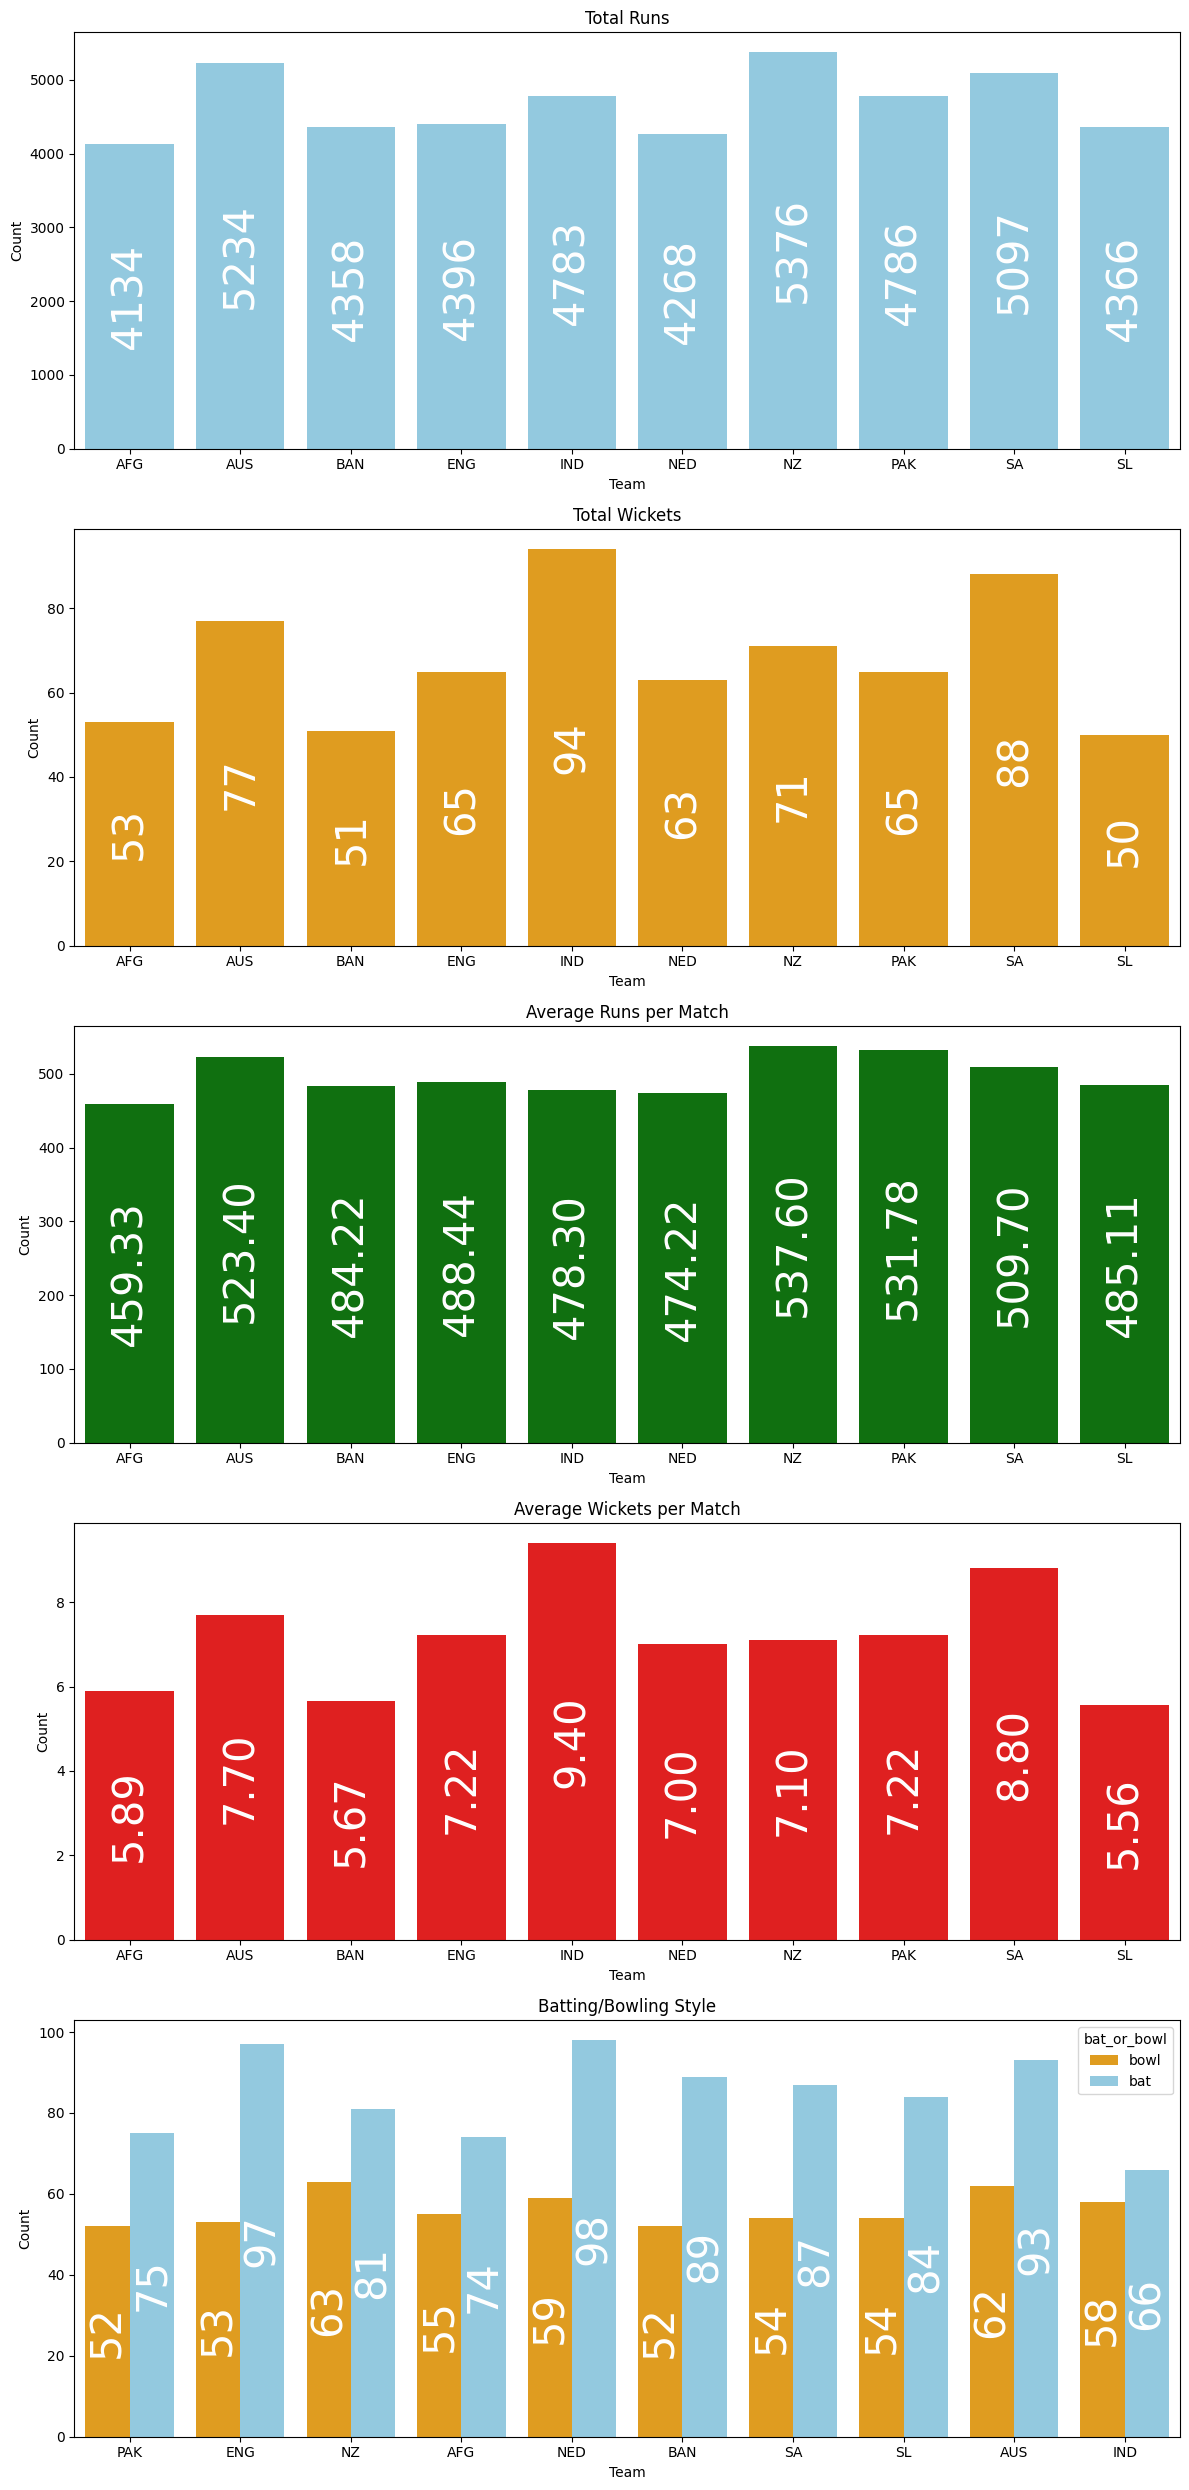

In [50]:
# Font size settings for each subplot
font_sizes = {'Total Runs': 30, 'Total Wickets': 30, 'Average Runs per Match': 30, 'Average Wickets per Match': 30, 'Batting/Bowling Style': 30}

# Visualize team-wise performance using subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 25))

# Subplot 1: Total Runs
sns.barplot(x=team_performance.index, y='runs', data=team_performance, color='skyblue', ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() /2 ), ha='center', va='center', color='white', fontsize=font_sizes['Total Runs'],  rotation=90)

axes[0].set_title('Total Runs')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Count')

# Subplot 2: Total Wickets
sns.barplot(x=team_performance.index, y='wkts', data=team_performance, color='orange', ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center', color='white', fontsize=font_sizes['Total Wickets'], rotation=90)

axes[1].set_title('Total Wickets')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Count')

# Subplot 3: Average Runs per Match
sns.barplot(x=team_performance.index, y='avg_runs_per_match', data=team_performance, color='green', ax=axes[2])
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()/ 2), ha='center', va='center', color='white', fontsize=font_sizes['Average Runs per Match'], rotation=90)

axes[2].set_title('Average Runs per Match')
axes[2].set_xlabel('Team')
axes[2].set_ylabel('Count')

# Subplot 4: Average Wickets per Match
sns.barplot(x=team_performance.index, y='avg_wkts_per_match', data=team_performance, color='red', ax=axes[3])
for p in axes[3].patches:
    axes[3].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center', color='white', fontsize=font_sizes['Average Wickets per Match'], rotation=90)

axes[3].set_title('Average Wickets per Match')
axes[3].set_xlabel('Team')
axes[3].set_ylabel('Count')

# Subplot 5: Batting/Bowling Style
sns.countplot(x='team', data=data, hue='bat_or_bowl', ax=axes[4], palette={'bat': 'skyblue', 'bowl': 'orange'})
for p in axes[4].patches:
    axes[4].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center', color='white', fontsize=font_sizes['Batting/Bowling Style'], rotation=90)

    axes[4].set_title('Batting/Bowling Style')
axes[4].set_xlabel('Team')
axes[4].set_ylabel('Count')

plt.tight_layout()
plt.savefig('Team-performance.png', dpi=900)
plt.show()

## Best performing team for each metric 

In [11]:
print("Best Performing Team for Each Metric:")
print("-------------------------------------")
print("Total Runs:", team_performance['runs'].idxmax())
print("Total Wickets:", team_performance['wkts'].idxmax())
print("Average Runs per Match:", team_performance['avg_runs_per_match'].idxmax())
print("Average Wickets per Match:", team_performance['avg_wkts_per_match'].idxmax())
print("\nDominant Batting/Bowling Style for Each Team:")
print("--------------------------------------------")
for team, style in data.groupby(['team', 'bat_or_bowl']).size().unstack().idxmax(axis=1).items():
    print(f"{team}: {style}")

Best Performing Team for Each Metric:
-------------------------------------
Total Runs: NZ
Total Wickets: IND
Average Runs per Match: NZ
Average Wickets per Match: IND

Dominant Batting/Bowling Style for Each Team:
--------------------------------------------
AFG: bat
AUS: bat
BAN: bat
ENG: bat
IND: bat
NED: bat
NZ: bat
PAK: bat
SA: bat
SL: bat


# Player Performance Analysis 

## Required analysis

- Evaluate individual player statistics for both batting and bowling.
- Identify leading run-scorers and wicket-takers.
- Assess the impact of players on their team's performance.

## Metrics

### Batting players
- Total runs
- Total bb_bf
- Total 4s
- Total 6s
- Mean sr
- Total not_out
- Mean mins

### Bowling players

- Total wkts
- Total bb_bf
- Total mdns
- Mean econ
- Total 4s
- Total 6s
- Mean sr
- Mean mins

## Content 

The following section contains the following topics

### Player statistics
- Lead run scorers - batting players
- Best performing batting player in each metric
- Lead wichet takers - bowling players
- Best performing bowling player in each metric
- Runs VS Wickets


In [12]:
# Number of players 
len(data['player'].unique())

152

## Player statistics

In [10]:
# Separate Batting and Bowling Data
batting_data = data[data['bat_or_bowl'] == 'bat']
bowling_data = data[data['bat_or_bowl'] == 'bowl']



batting_players = batting_data.groupby('player').agg({
    'runs': 'sum',
    'bb_bf': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean',
    'not_out': 'sum',
    'mins': 'mean'
})

bowling_players = bowling_data.groupby('player').agg({
    'wkts': 'sum',
    'bb_bf': 'sum',
    'mdns': 'sum',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean',
    'mins': 'mean'
})

# Merge batting and bowling 
player_stats = pd.merge(batting_players, bowling_players, on='player', how='outer', suffixes=('_batting', '_bowling'))

# Total stats
player_stats['total_runs'] = player_stats['runs'] + player_stats['wkts']
player_stats = player_stats.sort_values(by='total_runs', ascending=False).reset_index()

player_stats.to_csv('player_stats.csv')
player_stats

player   runs  bb_bf_batting  4s_batting  6s_batting  \
0           V Kohli (IND)  711.0          784.0        64.0         9.0   
1         R Ravindra (NZ)  578.0          543.0        55.0        17.0   
2        DJ Mitchell (NZ)  552.0          497.0        48.0        22.0   
3         RG Sharma (IND)  550.0          443.0        62.0        28.0   
4          MR Marsh (AUS)  426.0          395.0        42.0        20.0   
..                    ...    ...            ...         ...         ...   
147      LB Williams (SA)    NaN            NaN         NaN         NaN   
148  Mohammed Siraj (IND)    NaN            NaN         NaN         NaN   
149        R Ashwin (IND)    NaN            NaN         NaN         NaN   
150       SA Abbott (AUS)    NaN            NaN         NaN         NaN   
151       SN Thakur (IND)    NaN            NaN         NaN         NaN   

     sr_batting  not_out  mins_batting  wkts  bb_bf_bowling  mdns    econ  \
0       82.9560      3.0      109.7000   1.0           21.0   0.0  4.1650   
1       94.5670      1.0       87.2000   5.0          394.0   0.0  6.2433   
2      105.5422      1.0       80.4444   0.0            9.0   0.0  6.5000   
3      125.5260      0.0       61.7000   1.0            5.0   0.0  8.4000   
4       82.6111      1.0       58.6667   2.0           66.0   0.0  7.9375   
..          ...      ...           ...   ...            ...   ...     ...   
147         NaN      NaN           NaN   2.0           52.0   1.0  6.4600   
148         NaN      NaN           NaN  13.0          453.0   6.0  5.3210   
149         NaN      NaN           NaN   1.0           60.0   1.0  3.4000   
150         NaN      NaN           NaN   2.0           60.0   0.0  6.1000   
151         NaN      NaN           NaN   2.0          102.0   0.0  5.9033   

     4s_bowling  6s_bowling  sr_bowling  mins_bowling  total_runs  
0           0.0         0.0         NaN           NaN       712.0  
1           0.0         0.0         NaN           NaN       583.0  
2           0.0         0.0         NaN           NaN       552.0  
3           0.0         0.0         NaN           NaN       551.0  
4           0.0         0.0         NaN           NaN       428.0  
..          ...         ...         ...           ...         ...  
147         0.0         0.0         NaN           NaN         NaN  
148         0.0         0.0         NaN           NaN         NaN  
149         0.0         0.0         NaN           NaN         NaN  
150         0.0         0.0         NaN           NaN         NaN  
151         0.0         0.0         NaN           NaN         NaN  

[152 rows x 17 columns]

### Lead run scorers - batting players

In [11]:
leading_run_scorers = batting_players.sort_values(by='runs', ascending=False)
leading_run_scorers.to_csv('leading_run_scorers_batting_players.csv')
leading_run_scorers.head(10)

runs  bb_bf    4s    6s        sr  not_out      mins
player                                                                      
V Kohli (IND)            711    784  64.0   9.0   82.9560      3.0  109.7000
Q de Kock (SA)           594    555  57.0  21.0  106.5390      0.0   79.9000
R Ravindra (NZ)          578    543  55.0  17.0   94.5670      1.0   87.2000
DJ Mitchell (NZ)         552    497  48.0  22.0  105.5422      1.0   80.4444
RG Sharma (IND)          550    443  62.0  28.0  125.5260      0.0   61.7000
DA Warner (AUS)          528    491  49.0  24.0  108.1990      0.0   75.8000
SS Iyer (IND)            526    465  36.0  24.0   93.0050      3.0   64.8000
HE van der Dussen (SA)   448    530  39.0   8.0   66.1140      1.0   79.4000
MR Marsh (AUS)           426    395  42.0  20.0   82.6111      1.0   58.6667
AK Markram (SA)          406    366  44.0   9.0  151.5250      1.0   51.0000

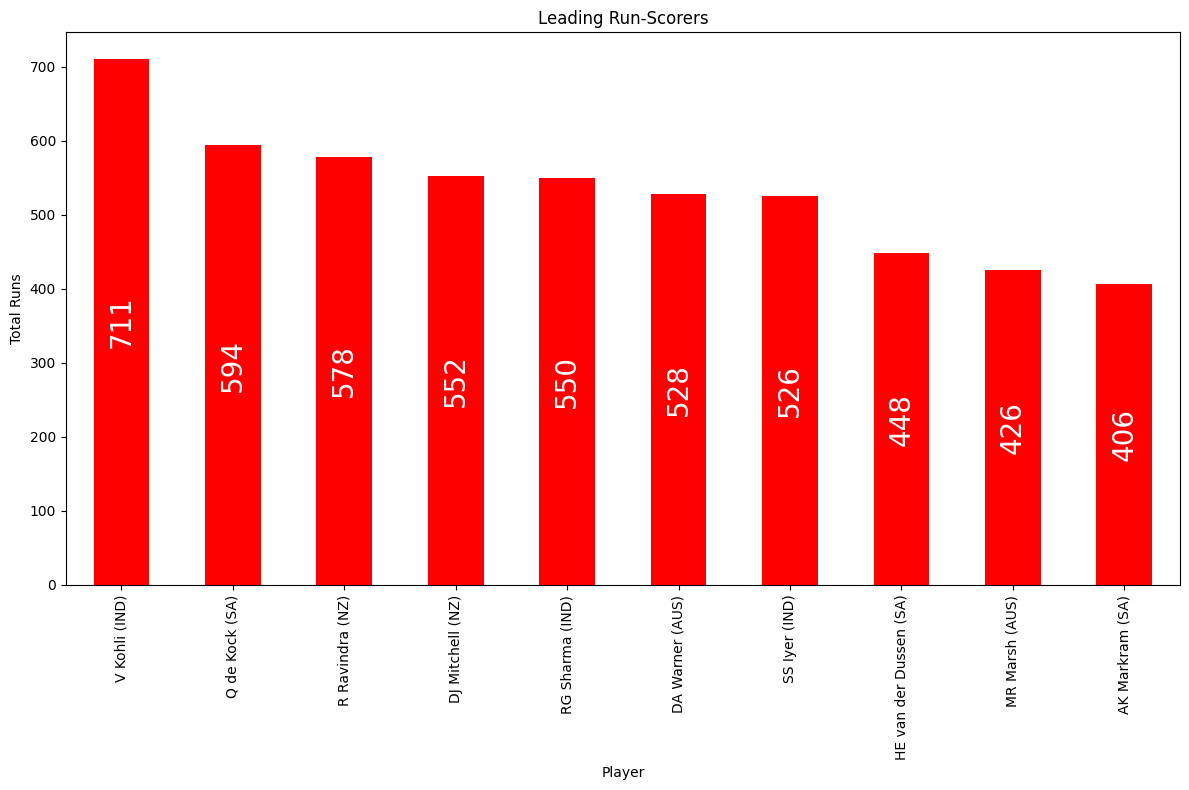

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 8))  # Adjust the values (width, height) as needed
ax1 = leading_run_scorers['runs'].head(10).plot(kind='bar', title='Leading Run-Scorers', color='red')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() /2 ), ha='center', va='center', color='white', fontsize=20,  rotation=90)
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.savefig('top_10_leading_run_scorers_batting.png', dpi=900)
plt.show()

### Best performing batting player in each metric

In [74]:
print("Best Performing Batting Players")
print("-------------------------------------")
for column in batting_players.columns:
    max_player = batting_players.sort_values(by=column, ascending=False).head(1).index[0]
    max_value = batting_players.sort_values(by=column, ascending=False).head(1)[column][0]
    print(f"\nHighest {column}: {max_player} ({max_value})")

Best Performing Batting Players
-------------------------------------

Highest runs: V Kohli (IND) (711)

Highest bb_bf: V Kohli (IND) (784)

Highest 4s: V Kohli (IND) (64.0)

Highest 6s: RG Sharma (IND) (28.0)

Highest sr: DJ Willey (ENG) (163.93333333333334)

Highest not_out: Shoriful Islam (BAN) (4.0)

Highest mins: V Kohli (IND) (109.7)


### Lead wichet takers - bowling players

In [15]:
leading_wicket_takers = bowling_players.sort_values(by='wkts', ascending=False)
leading_wicket_takers.to_csv("leading_wicket_takers_bowling.csv")
leading_wicket_takers.head(10)

wkts  bb_bf  mdns    econ   4s   6s  sr  mins
player                                                                  
Mohammed Shami (IND)       23.0    251   3.0  4.8767  0.0  0.0 NaN   NaN
A Zampa (AUS)              22.0    516   1.0  5.3800  0.0  0.0 NaN   NaN
D Madushanka (SL)          21.0    470   4.0  6.7867  0.0  0.0 NaN   NaN
G Coetzee (SA)             20.0    381   1.0  6.4425  0.0  0.0 NaN   NaN
JJ Bumrah (IND)            18.0    497   7.0  3.7850  0.0  0.0 NaN   NaN
Shaheen Shah Afridi (PAK)  18.0    486   3.0  5.8956  0.0  0.0 NaN   NaN
M Jansen (SA)              17.0    414   3.0  6.5089  0.0  0.0 NaN   NaN
MJ Santner (NZ)            16.0    556   4.0  4.9580  0.0  0.0 NaN   NaN
Haris Rauf (PAK)           16.0    474   1.0  6.7689  0.0  0.0 NaN   NaN
RA Jadeja (IND)            16.0    501   4.0  4.3690  0.0  0.0 NaN   NaN

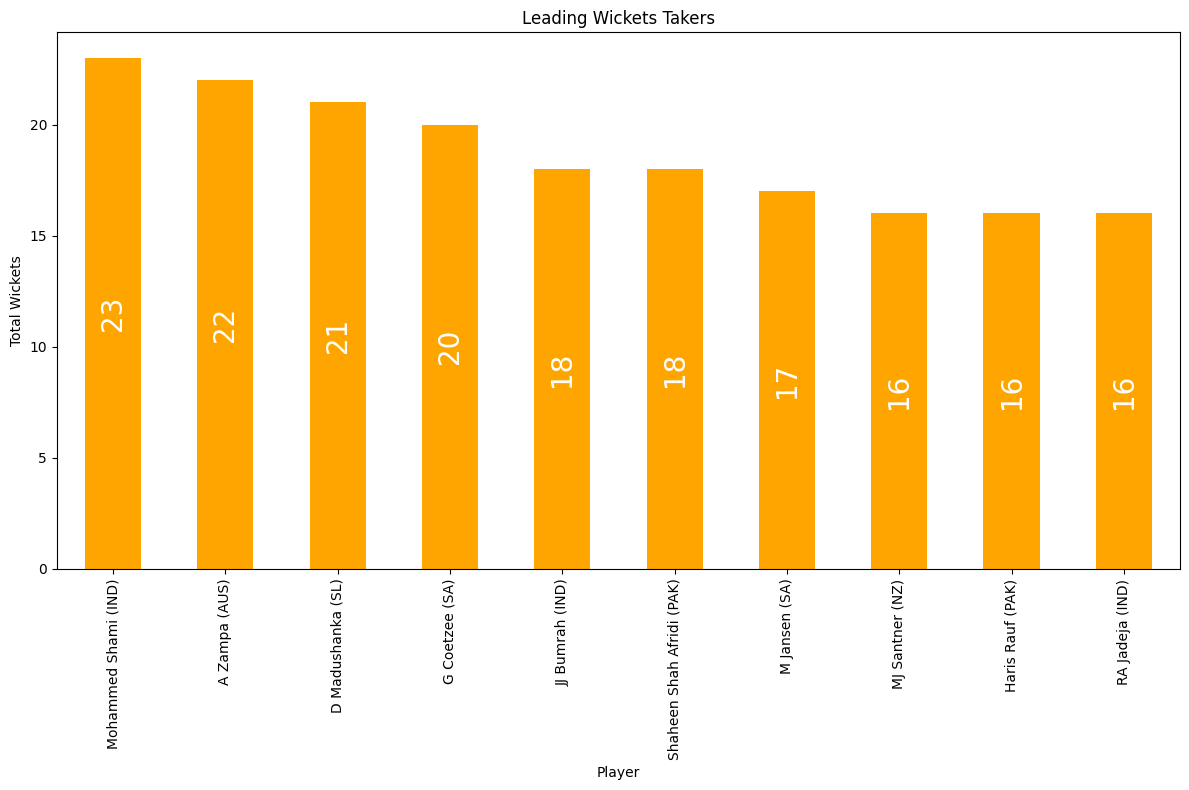

In [11]:
fig, ax2 = plt.subplots(figsize=(12, 8))  # Adjust the values (width, height) as needed
ax2 = leading_wicket_takers['wkts'].head(10).plot(kind='bar', title='Leading Wickets Takers', color='orange')

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() /2 ), ha='center', va='center', color='white', fontsize=20,  rotation=90)
plt.xlabel('Player')
plt.ylabel('Total Wickets')
plt.tight_layout()
plt.savefig('top_10_leading_wickets_takers_bowling.png', dpi=900)
plt.show()

### Best performing bowling player in each metric

In [76]:
print("Best Performing Bowling Players")
print("-------------------------------------")
for column in bowling_players.columns:
    max_player = bowling_players.sort_values(by=column, ascending=False).head(1).index[0]
    max_value = bowling_players.sort_values(by=column, ascending=False).head(1)[column][0]
    print(f"\nHighest {column}: {max_player} ({max_value})")

Best Performing Bowling Players
-------------------------------------

Highest wkts: Mohammed Shami (IND) (23.0)

Highest bb_bf: MJ Santner (NZ) (556)

Highest mdns: JR Hazlewood (AUS) (8.0)

Highest econ: JDS Neesham (NZ) (12.18)

Highest 4s: A Dutt (NED) (0.0)

Highest 6s: A Dutt (NED) (0.0)

Highest sr: A Dutt (NED) (nan)

Highest mins: A Dutt (NED) (nan)


### Runs VS Wickets

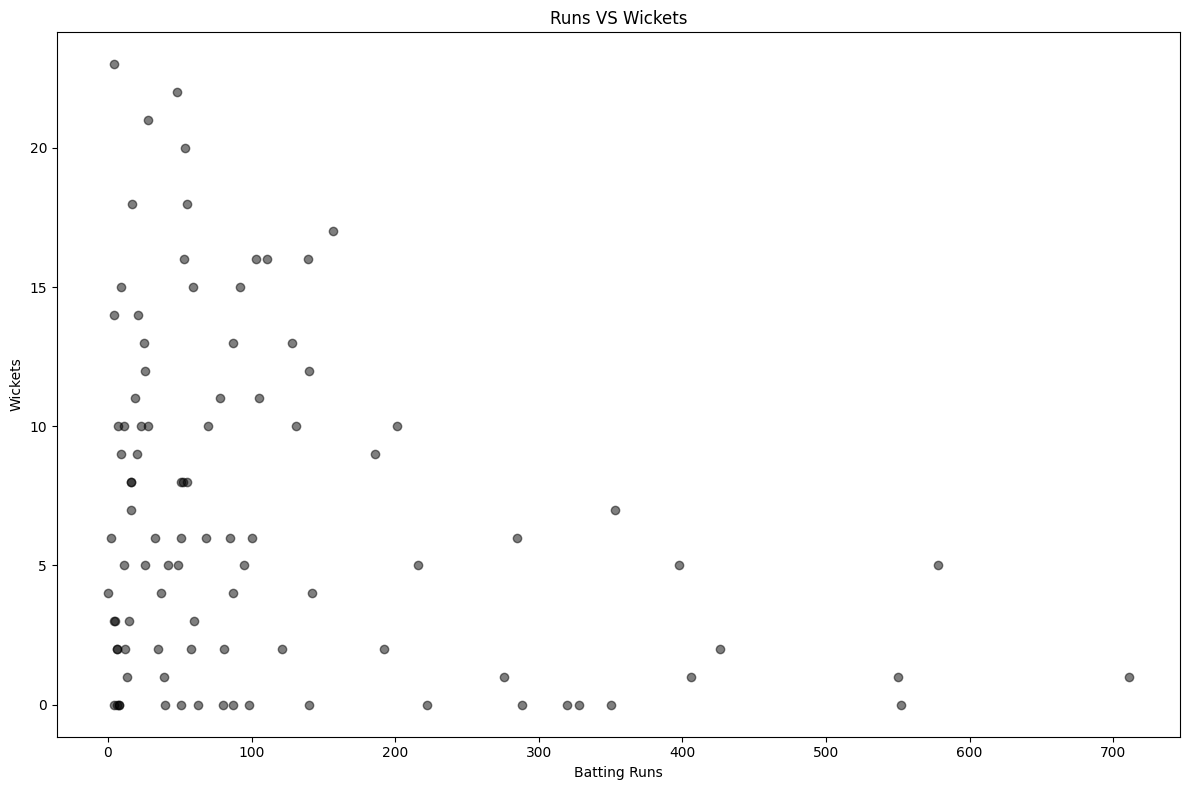

In [12]:
# Scatter plot for player impact
fig, ax2 = plt.subplots(figsize=(12, 8))  
plt.scatter(player_stats['runs'], player_stats['wkts'], color='k', alpha=0.5 )
plt.title('Runs VS Wickets')
plt.xlabel('Batting Runs')
plt.ylabel('Wickets')
plt.tight_layout()
plt.savefig('runs_VS_wickets.png', dpi=900)
plt.show()

# Opposition and Ground Analysis:

## Required analysis

- Investigate how teams and players perform against different oppositions.
- Examine performance variations across different playing grounds.
- Identify if there are specific teams or players that excel in certain conditions.

## Metrics

- Runs
- Wickets

## Content list 

the following section contain the following topics
### Team performance against different oppositions
- Total runs of each team VS different oppositions
- Opposition against which each team scored his highest runs
- Total wickets of each team VS different oppositions
- Opposition against which each team scored his highest wickets

### Players performance (batting, bowling) against different oppositions
- Top 10 run scorers performance VS different oppositions
- Opposition against which each of top 10 run scorers scored highest runs 
- Top 10 wicket takers performance VS different oppositions
- Opposition against which each of top 10 wicket takers scored highest wickets 

### Team performance on each play ground
- Total runs of each team in different play grounds
- Play ground on which each team scored the highest runs
- Total wickets of each team in different play grounds
- Play ground on which each team scored the highest wickets

### Players Performance (batting/bowling) on each play ground
- Top 10 run scorers performance in different play grounds 
- Play ground on which each player (top 10) scored highest runs
- Top 10 wicket takers performance in different play grounds 
- Play grounds on which each player (top 10) scored highest wickets




## Team performance against different oppositions

In [13]:
team_opposition_stats = data.groupby(['team','opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()
team_opposition_stats.to_csv('team_opposition_stats.csv')
team_opposition_stats

team      opposition  runs  wkts
0   AFG     v Australia   563   6.0
1   AFG    v Bangladesh   303   3.0
2   AFG       v England   480  10.0
3   AFG         v India   525   2.0
4   AFG   v Netherlands   346   6.0
..  ...             ...   ...   ...
86   SL         v India   391   6.0
87   SL   v Netherlands   495   9.0
88   SL   v New Zealand   339   4.0
89   SL      v Pakistan   675   4.0
90   SL  v South Africa   733   5.0

[91 rows x 4 columns]

### Total runs of each team VS different oppositions

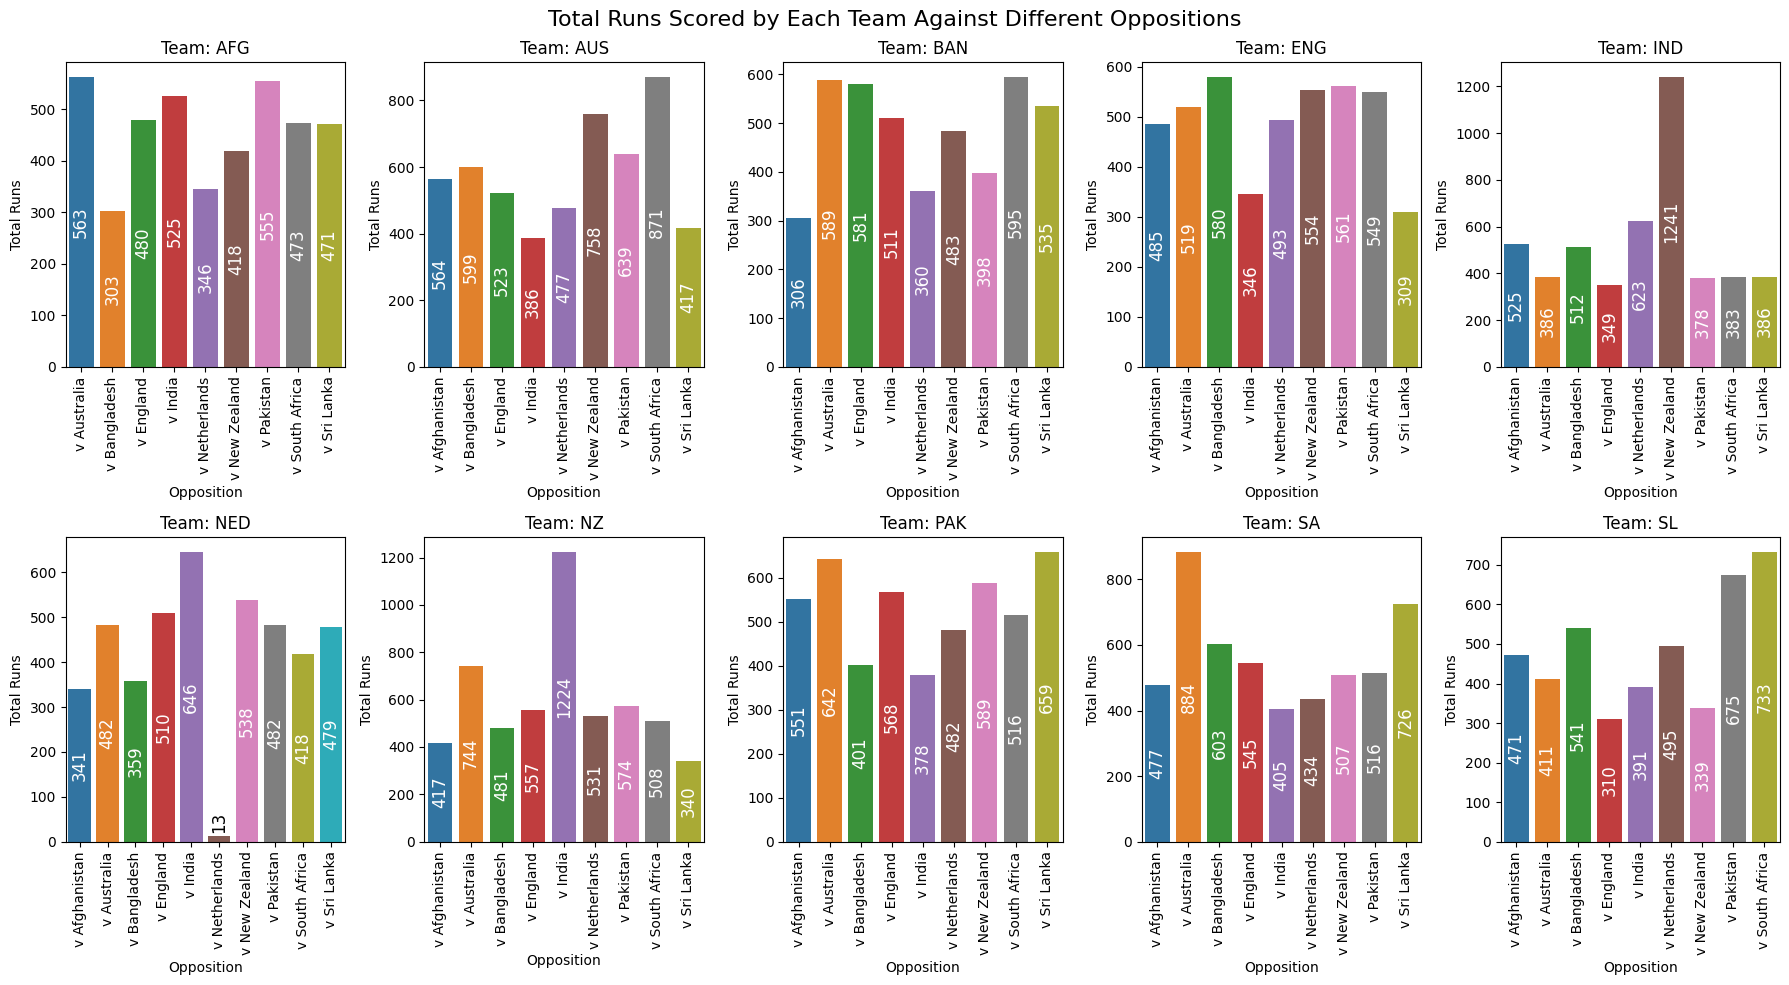

In [104]:
# Get unique team names
unique_teams = team_opposition_stats['team'].unique()

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Runs Scored by Each Team Against Different Oppositions', fontsize=16)

# Iterate through unique team names and create bar plots
for i, team in enumerate(unique_teams):
    row, col = divmod(i, 5)
    team_data = team_opposition_stats[team_opposition_stats['team'] == team]
    ax = sns.barplot(x='opposition', y='runs', data=team_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.2 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'Team: {team}')
    axes[row, col].set_ylabel('Total Runs')
    axes[row, col].set_xlabel('Opposition')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_runs_of_each_team_VS_each_opposition.png', dpi=1500)
plt.show()

### Opposition against which each team scored his highest runs

In [17]:
def get_max_rows(group, col):
    max_value = group[col].max()
    return group[group[col] == max_value]

In [69]:
max_team_runs_df = team_opposition_stats.groupby('team').apply(lambda x: get_max_rows(x, 'runs'))

# Reset index for better representation
max_team_runs_df.reset_index(drop=True, inplace=True)
max_team_runs_df.drop('wkts', axis=1, inplace=True)
# Display the resulting DataFrame for maximum runs
max_team_runs_df.to_csv('Opposition against which each team scored his highest runs.csv')
max_team_runs_df

team      opposition  runs
0  AFG     v Australia   563
1  AUS  v South Africa   871
2  BAN  v South Africa   595
3  ENG    v Bangladesh   580
4  IND   v New Zealand  1241
5  NED         v India   646
6   NZ         v India  1224
7  PAK     v Sri Lanka   659
8   SA     v Australia   884
9   SL  v South Africa   733

### Total wickets of each team VS different oppositions

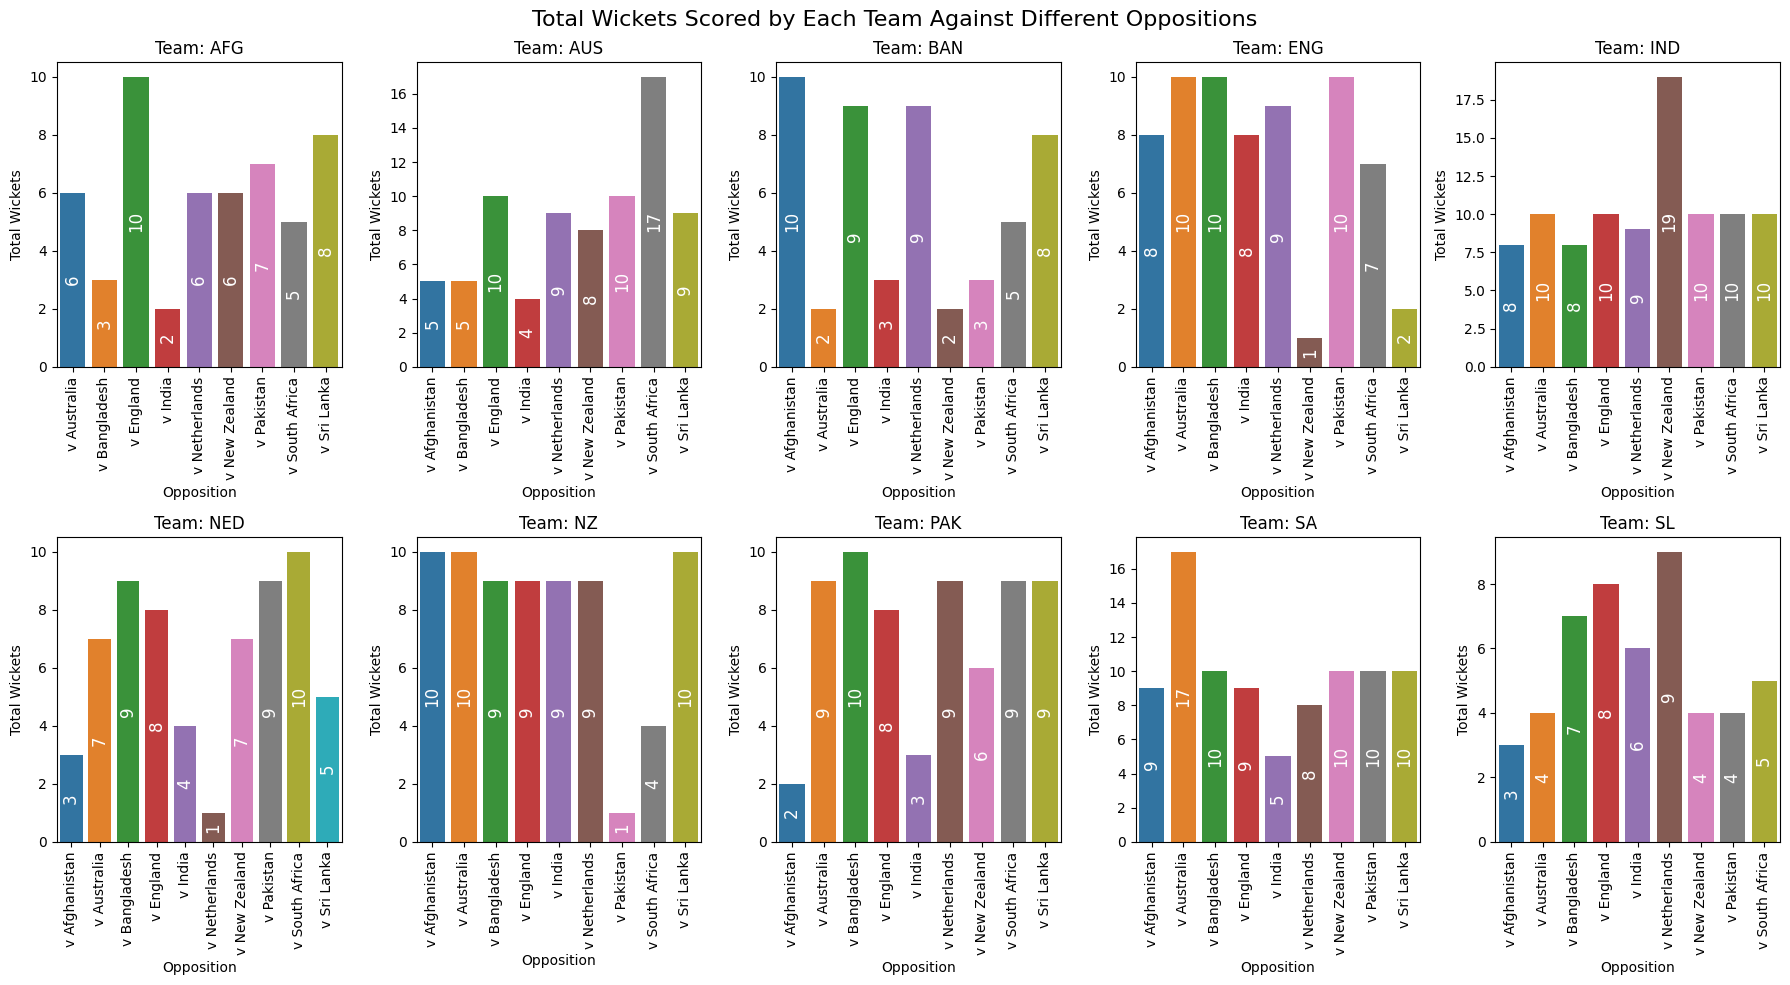

In [66]:
unique_teams = opposition_stats['team'].unique()

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Wickets Scored by Each Team Against Different Oppositions', fontsize=16)

# Iterate through unique team names and create bar plots
for i, team in enumerate(unique_teams):
    row, col = divmod(i, 5)
    team_data = opposition_stats[opposition_stats['team'] == team]
    ax = sns.barplot(x='opposition', y='wkts', data=team_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.05 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'Team: {team}')
    axes[row, col].set_ylabel('Total Wickets')
    axes[row, col].set_xlabel('Opposition')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_wkts_of_each_team_VS_each_opposition.png', dpi=1500)
plt.show()

### Opposition against which each team scored his highest wickets

In [68]:
max_team_wkts_df = team_opposition_stats.groupby('team').apply(lambda x: get_max_rows(x, 'wkts'))

# Reset index for better representation
max_team_wkts_df.reset_index(drop=True, inplace=True)
max_team_wkts_df.drop('runs', axis=1, inplace=True)
max_team_wkts_df.to_csv('Opposition against which each team scored his highest wkts.csv')
max_team_wkts_df

team      opposition  wkts
0   AFG       v England  10.0
1   AUS  v South Africa  17.0
2   BAN   v Afghanistan  10.0
3   ENG     v Australia  10.0
4   ENG    v Bangladesh  10.0
5   ENG      v Pakistan  10.0
6   IND   v New Zealand  19.0
7   NED  v South Africa  10.0
8    NZ   v Afghanistan  10.0
9    NZ     v Australia  10.0
10   NZ     v Sri Lanka  10.0
11  PAK    v Bangladesh  10.0
12   SA     v Australia  17.0
13   SL   v Netherlands   9.0

## Players performance (batting, bowling) against different oppositions

In [15]:
player_opposition_stats = data.groupby(['player','opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()
player_opposition_stats.to_csv('player_opposition_stats.csv')
player_opposition_stats

player      opposition  runs  wkts
0     A Dutt (NED)   v Afghanistan    59   0.0
1     A Dutt (NED)     v Australia    60   1.0
2     A Dutt (NED)    v Bangladesh    35   1.0
3     A Dutt (NED)       v England    68   2.0
4     A Dutt (NED)         v India    57   0.0
..             ...             ...   ...   ...
973  WA Young (NZ)     v Australia    32   0.0
974  WA Young (NZ)       v England     0   0.0
975  WA Young (NZ)         v India    17   0.0
976  WA Young (NZ)   v Netherlands    70   0.0
977  WA Young (NZ)  v South Africa    33   0.0

[978 rows x 4 columns]

### Top 10 run scorers performance VS different oppositions

In [86]:
leading_run_scorers.head(10).index

Index(['V Kohli (IND)', 'Q de Kock (SA)', 'R Ravindra (NZ)',
       'DJ Mitchell (NZ)', 'RG Sharma (IND)', 'DA Warner (AUS)',
       'SS Iyer (IND)', 'HE van der Dussen (SA)', 'MR Marsh (AUS)',
       'AK Markram (SA)'],
      dtype='object', name='player')

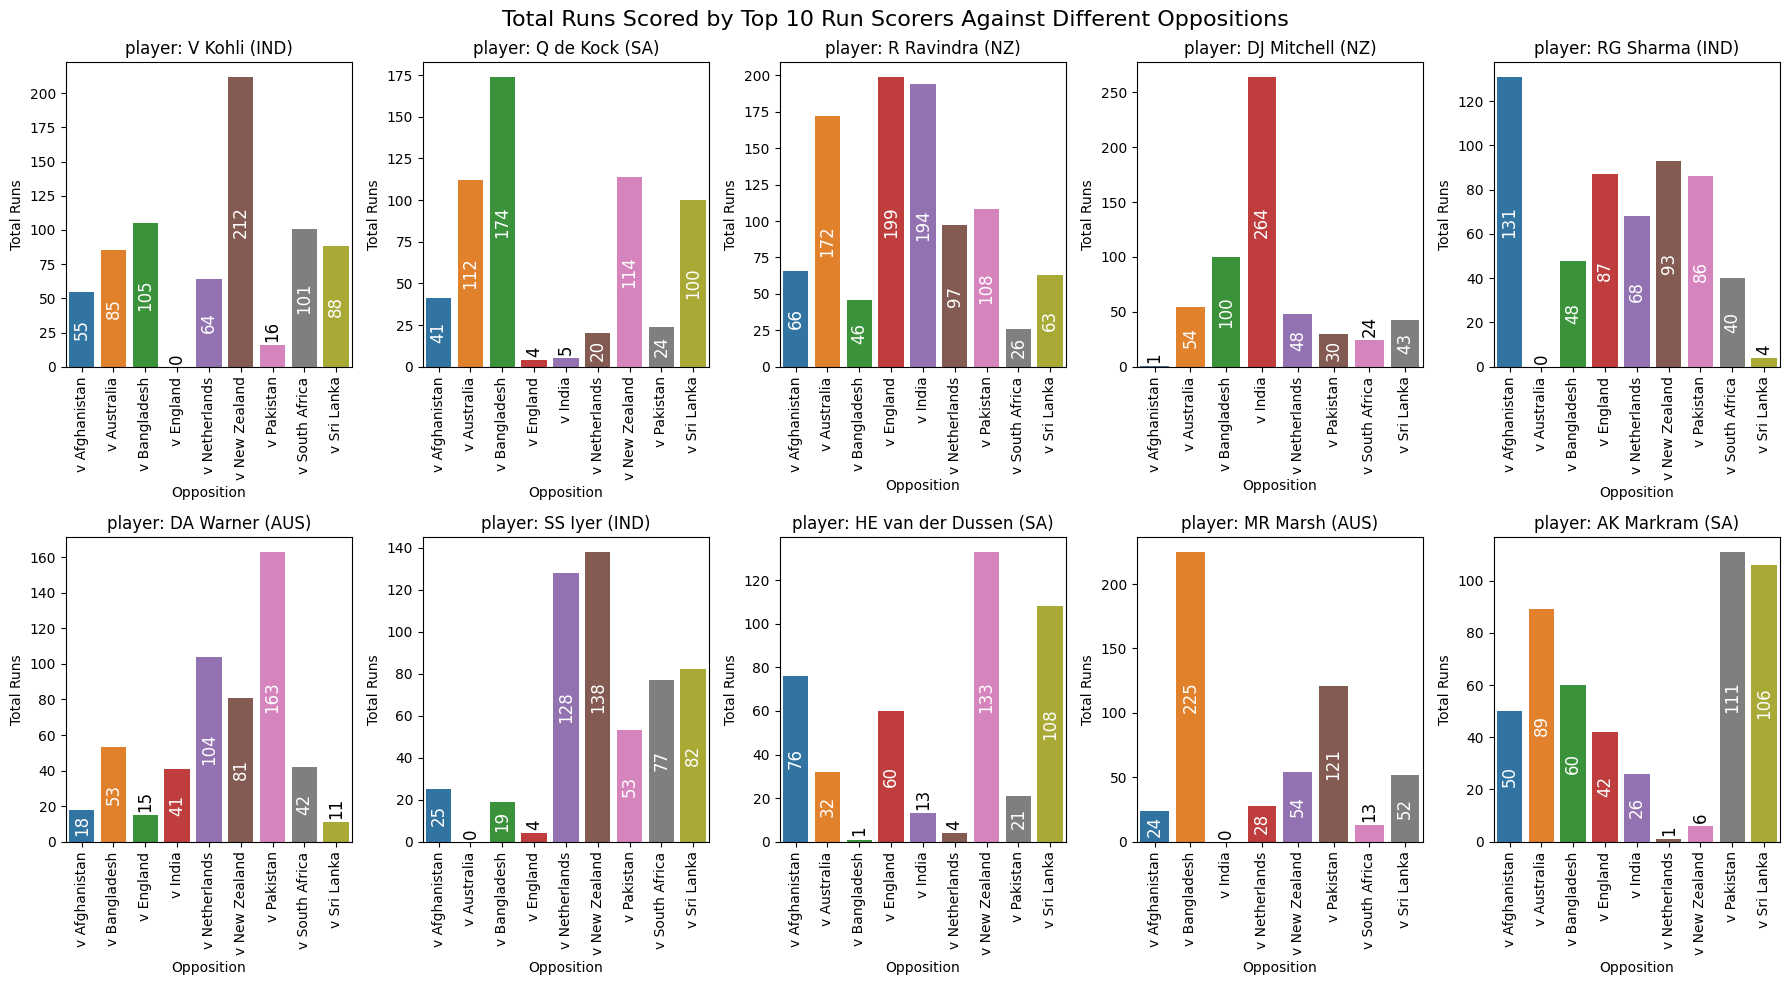

In [89]:

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Runs Scored by Top 10 Run Scorers Against Different Oppositions', fontsize=16)

# Iterate through unique team names and create bar plots
for i, player in enumerate(leading_run_scorers.head(10).index):
    row, col = divmod(i, 5)
    player_data = player_opposition_stats[player_opposition_stats['player'] == player]
    ax = sns.barplot(x='opposition', y='runs', data=player_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'player: {player}')
    axes[row, col].set_ylabel('Total Runs')
    axes[row, col].set_xlabel('Opposition')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_runs_of_top_10_run_scorers_VS_each_opposition.png', dpi=1500)
plt.show()

### Opposition against which each of top 10 run scorers scored highest runs 

In [22]:
max_player_runs_df = player_opposition_stats.groupby('player').apply(lambda x: get_max_rows(x, 'runs'))

# Reset index for better representation
max_player_runs_df.reset_index(drop=True, inplace=True)
max_player_runs_df = max_player_runs_df[max_player_runs_df['player'].isin(leading_run_scorers.head(10).index)]
max_player_runs_df.drop('wkts', axis=1, inplace=True)
max_player_runs_df.to_csv('Opposition against which each player (top 10) scored his highest runs.csv')
max_player_runs_df

player     opposition  runs
4           AK Markram (SA)     v Pakistan   111
24          DA Warner (AUS)     v Pakistan   163
26         DJ Mitchell (NZ)        v India   264
39   HE van der Dussen (SA)  v New Zealand   133
84           MR Marsh (AUS)   v Bangladesh   225
107          Q de Kock (SA)   v Bangladesh   174
110         R Ravindra (NZ)      v England   199
113         RG Sharma (IND)  v Afghanistan   131
128           SS Iyer (IND)  v New Zealand   138
148           V Kohli (IND)  v New Zealand   212

### Top 10 wicket takers performance VS different oppositions

In [90]:
leading_wicket_takers.head(10).index

Index(['Mohammed Shami (IND)', 'A Zampa (AUS)', 'D Madushanka (SL)',
       'G Coetzee (SA)', 'JJ Bumrah (IND)', 'Shaheen Shah Afridi (PAK)',
       'M Jansen (SA)', 'MJ Santner (NZ)', 'Haris Rauf (PAK)',
       'RA Jadeja (IND)'],
      dtype='object', name='player')

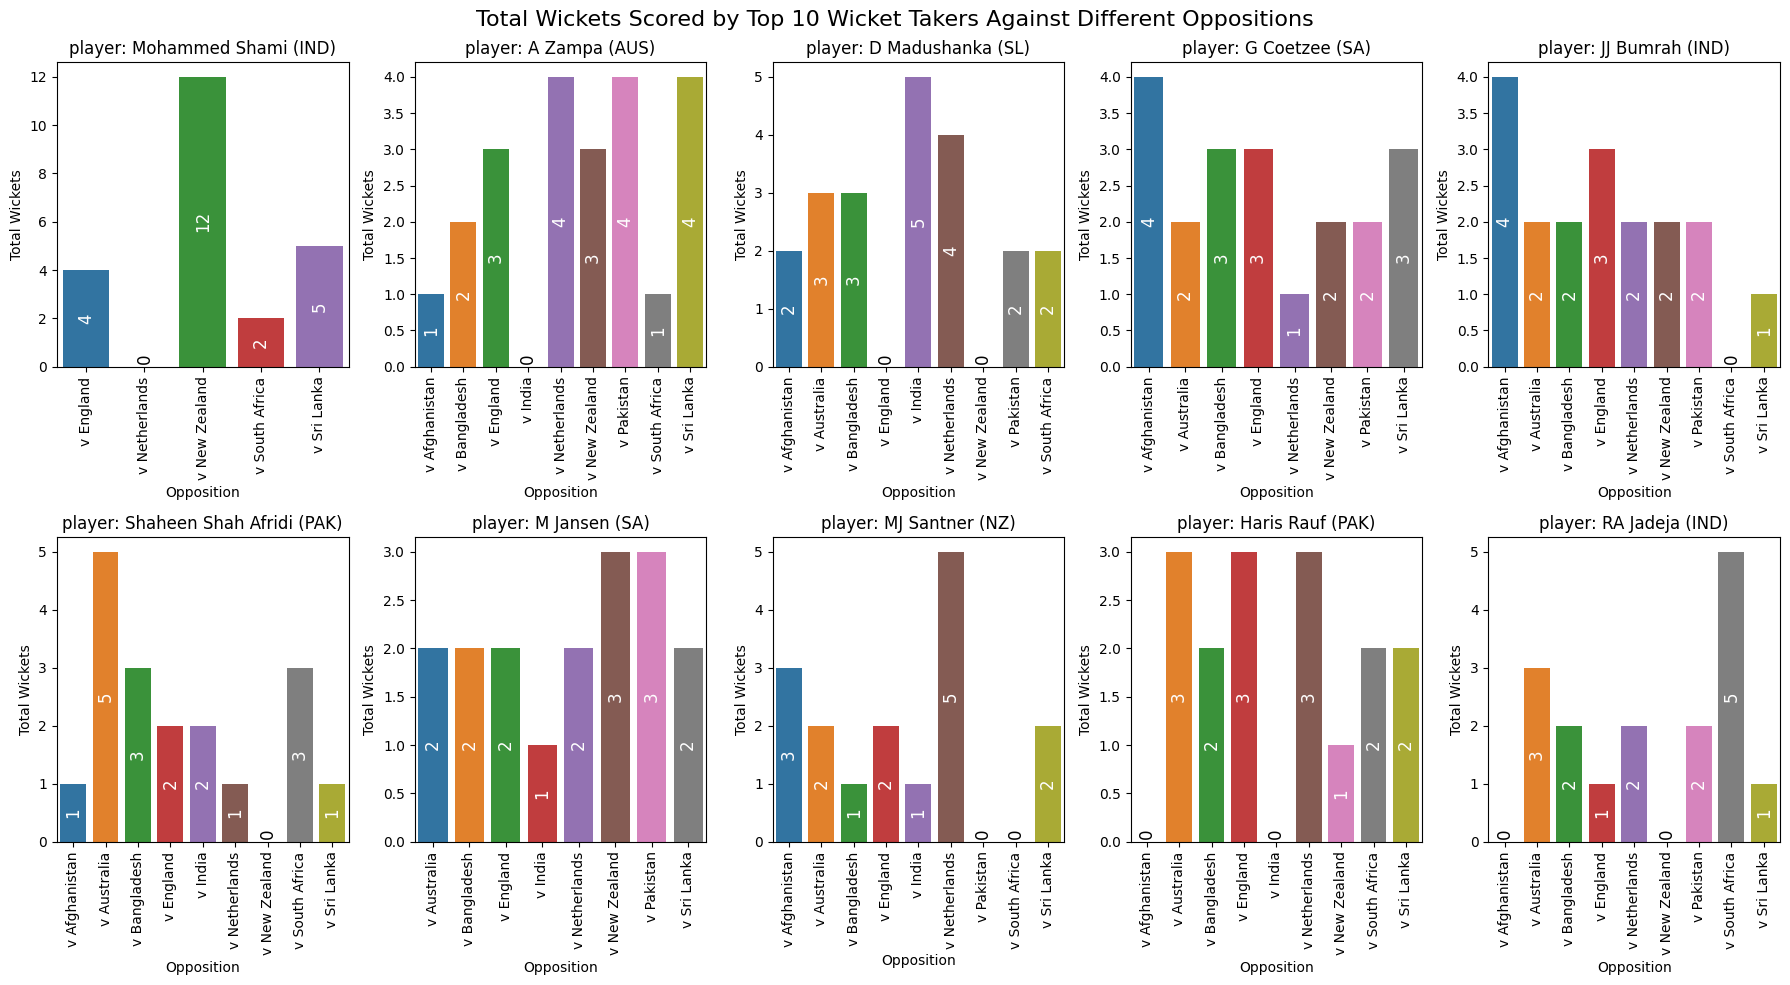

In [92]:

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Wickets Scored by Top 10 Wicket Takers Against Different Oppositions', fontsize=16)

# Iterate through unique team names and create bar plots
for i, player in enumerate(leading_wicket_takers.head(10).index):
    row, col = divmod(i, 5)
    player_data = player_opposition_stats[player_opposition_stats['player'] == player]
    ax = sns.barplot(x='opposition', y='wkts', data=player_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'player: {player}')
    axes[row, col].set_ylabel('Total Wickets')
    axes[row, col].set_xlabel('Opposition')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_wkts_of_top_10_wkts_takers_VS_each_opposition.png', dpi=1500)
plt.show()

### Opposition against which each of top 10 wicket takers scored highest wickets 

In [19]:
max_player_wkts_df = player_opposition_stats.groupby('player').apply(lambda x: get_max_rows(x, 'wkts'))

# Reset index for better representation
max_player_wkts_df.reset_index(drop=True, inplace=True)
max_player_wkts_df = max_player_wkts_df[max_player_wkts_df['player'].isin(leading_wicket_takers.head(10).index)]
max_player_wkts_df.drop('runs', axis=1, inplace=True)
max_player_wkts_df.to_csv('Opposition against which each player (top 10) scored his highest wkts.csv')
max_player_wkts_df

player      opposition  wkts
1                A Zampa (AUS)   v Netherlands   4.0
2                A Zampa (AUS)      v Pakistan   4.0
3                A Zampa (AUS)     v Sri Lanka   4.0
68           D Madushanka (SL)         v India   5.0
132             G Coetzee (SA)   v Afghanistan   4.0
161           Haris Rauf (PAK)     v Australia   3.0
162           Haris Rauf (PAK)       v England   3.0
163           Haris Rauf (PAK)   v Netherlands   3.0
212            JJ Bumrah (IND)   v Afghanistan   4.0
273              M Jansen (SA)   v New Zealand   3.0
274              M Jansen (SA)      v Pakistan   3.0
302            MJ Santner (NZ)   v Netherlands   5.0
344       Mohammed Shami (IND)   v New Zealand  12.0
400            RA Jadeja (IND)  v South Africa   5.0
490  Shaheen Shah Afridi (PAK)     v Australia   5.0

## Team performance on each play ground

In [5]:
team_ground_stats = data.groupby(['team','ground']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()
team_ground_stats.to_csv('team_ground_stats.csv')
team_ground_stats

team      ground  runs  wkts
0   AFG   Ahmedabad   473   5.0
1   AFG     Chennai   973  13.0
2   AFG       Delhi  1005  12.0
3   AFG  Dharamsala   303   3.0
4   AFG     Lucknow   346   6.0
..  ...         ...   ...   ...
67   SL       Delhi  1274  12.0
68   SL   Hyderabad   675   4.0
69   SL     Lucknow   906  13.0
70   SL        Pune   471   3.0
71   SL    Wankhede   391   6.0

[72 rows x 4 columns]

### Total runs of each team in different play grounds

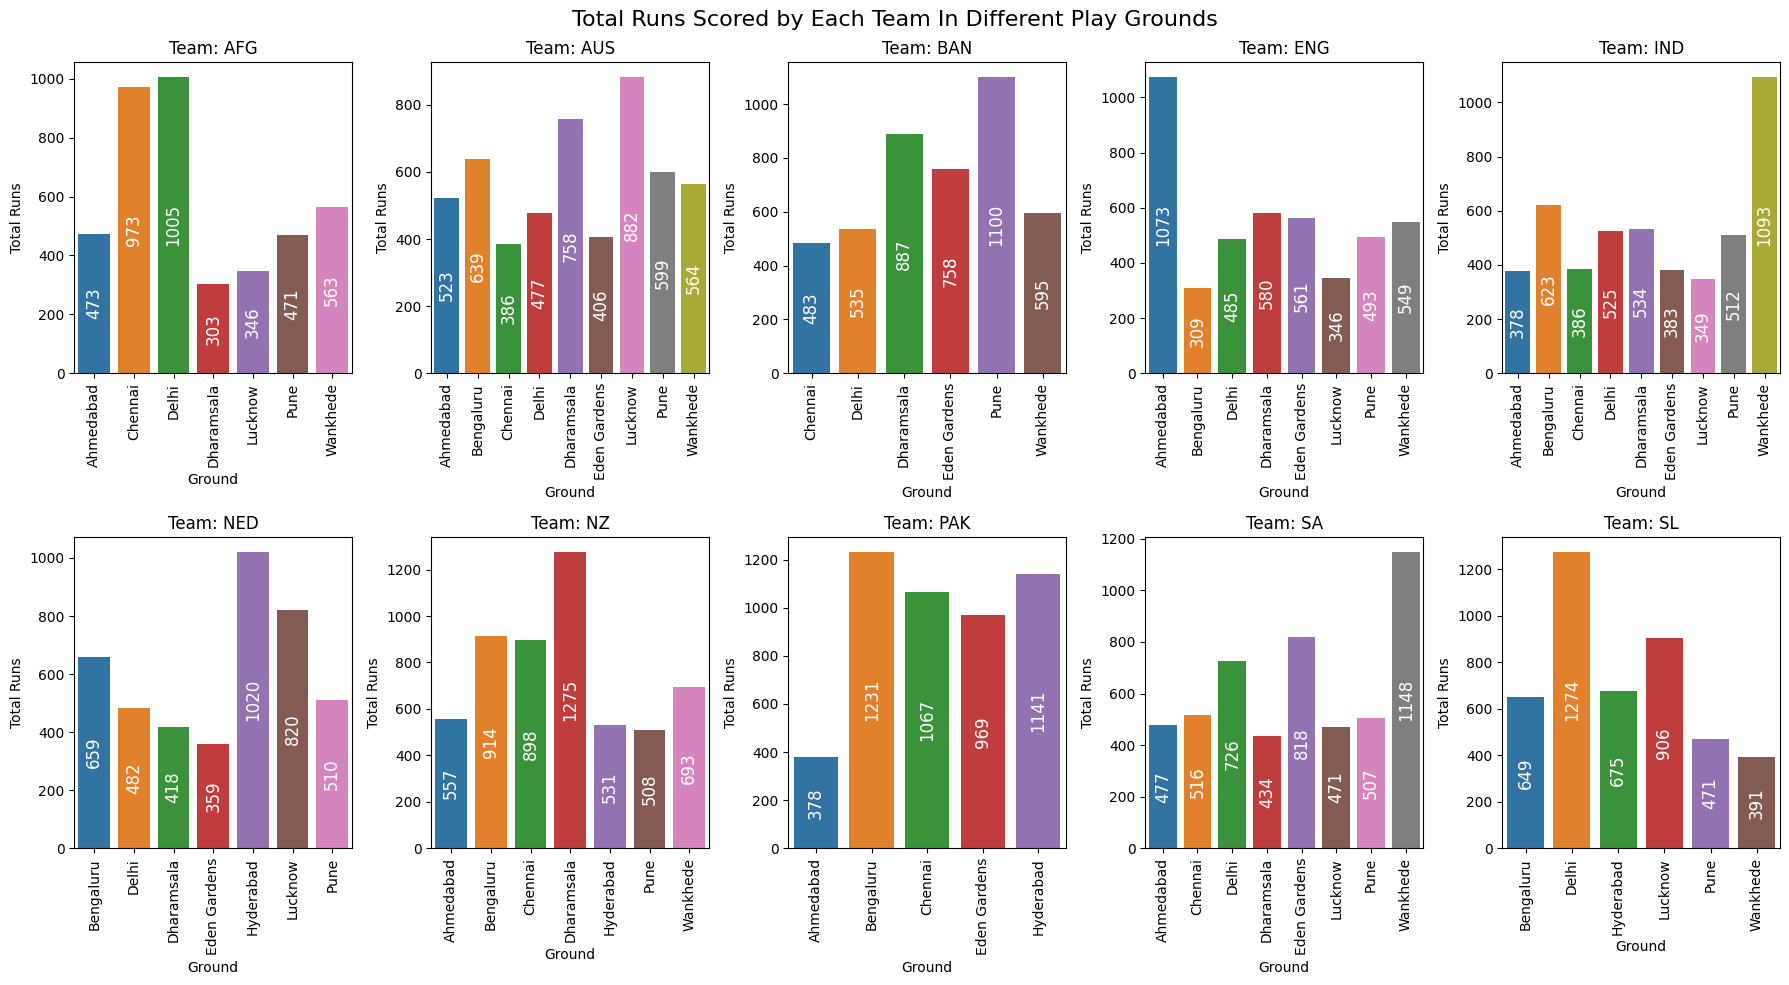

In [110]:
# Get unique team names
unique_teams = team_ground_stats['team'].unique()

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Runs Scored by Each Team In Different Play Grounds', fontsize=16)

# Iterate through unique team names and create bar plots
for i, team in enumerate(unique_teams):
    row, col = divmod(i, 5)
    ground_data = team_ground_stats[team_ground_stats['team'] == team]
    ax = sns.barplot(x='ground', y='runs', data=ground_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.2 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'Team: {team}')
    axes[row, col].set_ylabel('Total Runs')
    axes[row, col].set_xlabel('Ground')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_runs_of_each_team_in_each_ground.png', dpi=1500)
plt.show()

### Play ground on which each team scored the highest runs

In [8]:
max_team_ground_runs_df = team_ground_stats.groupby('team').apply(lambda x: get_max_rows(x, 'runs'))

# Reset index for better representation
max_team_ground_runs_df.reset_index(drop=True, inplace=True)
max_team_ground_runs_df.drop('wkts', axis=1, inplace=True)
max_team_ground_runs_df.to_csv('ground on which each team scored his highest runs.csv')
max_team_ground_runs_df

team      ground  runs
0  AFG       Delhi  1005
1  AUS     Lucknow   882
2  BAN        Pune  1100
3  ENG   Ahmedabad  1073
4  IND    Wankhede  1093
5  NED   Hyderabad  1020
6   NZ  Dharamsala  1275
7  PAK   Bengaluru  1231
8   SA    Wankhede  1148
9   SL       Delhi  1274

### Total wickets of each team in different play grounds

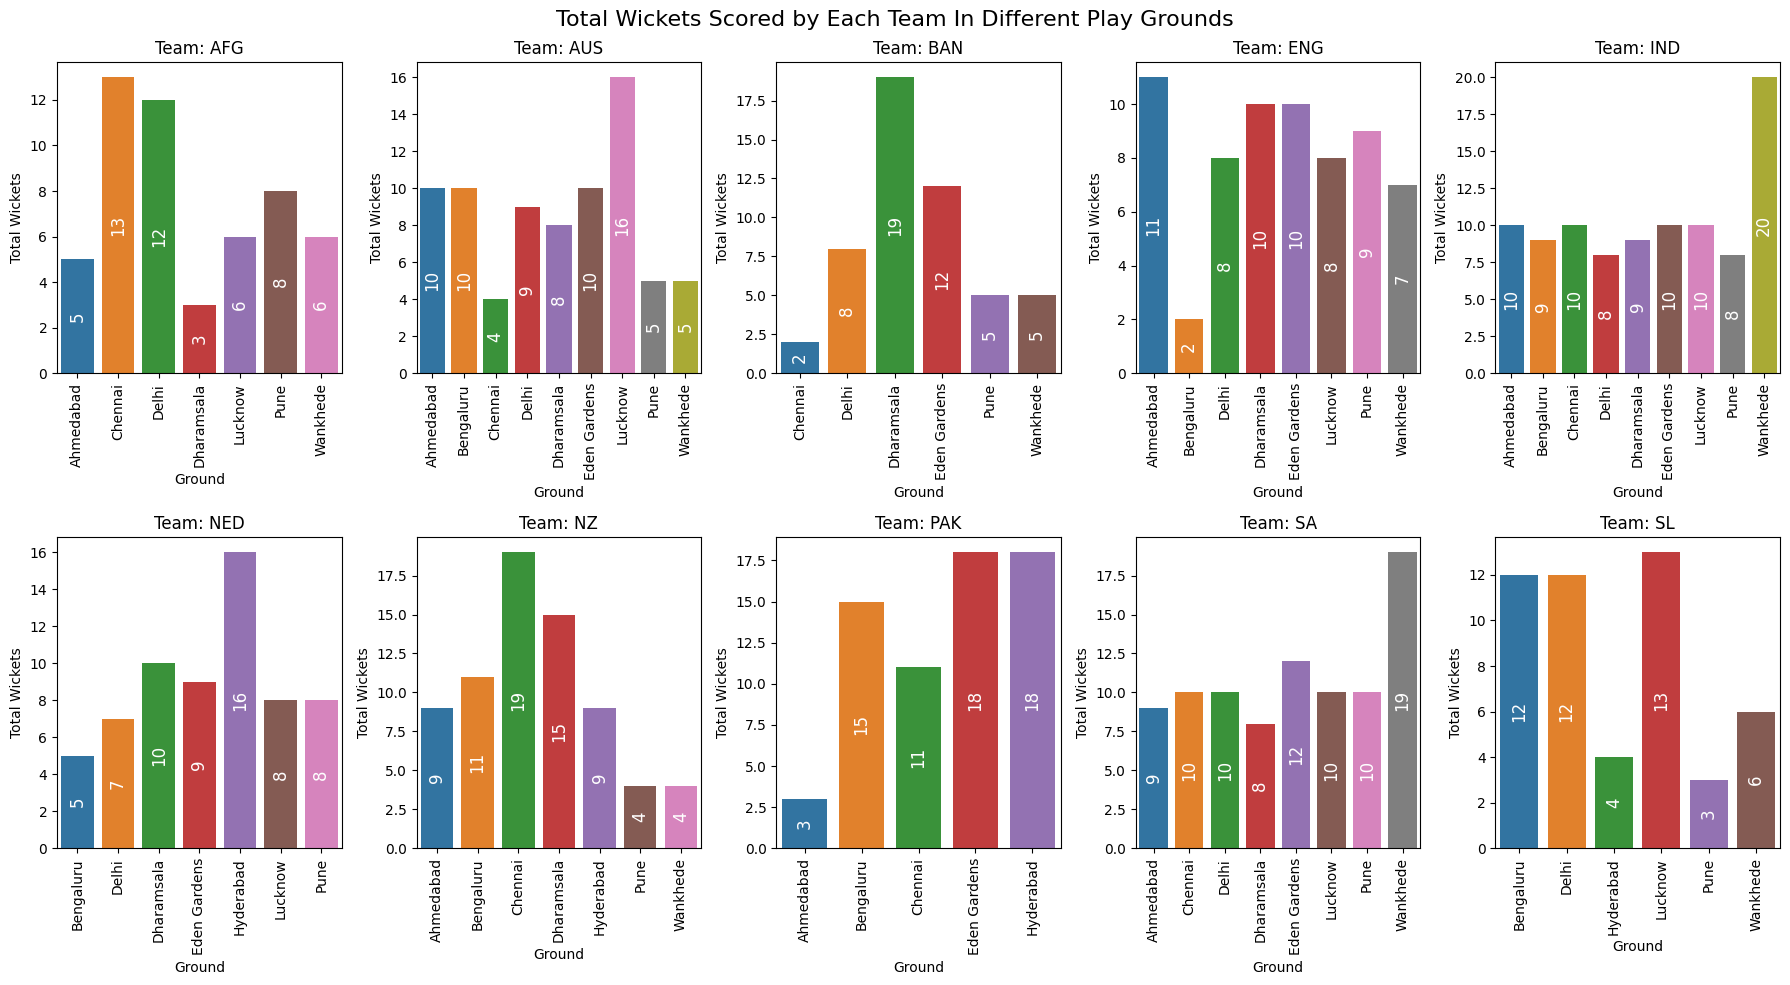

In [13]:
# Get unique team names
unique_teams = team_ground_stats['team'].unique()

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Wickets Scored by Each Team In Different Play Grounds', fontsize=16)

# Iterate through unique team names and create bar plots
for i, team in enumerate(unique_teams):
    row, col = divmod(i, 5)
    ground_data = team_ground_stats[team_ground_stats['team'] == team]
    ax = sns.barplot(x='ground', y='wkts', data=ground_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'Team: {team}')
    axes[row, col].set_ylabel('Total Wickets')
    axes[row, col].set_xlabel('Ground')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_wkts_of_each_team_in_each_ground.png', dpi=1500)
plt.show()

### Play ground on which each team scored the highest wickets

In [9]:
max_team_ground_runs_df = team_ground_stats.groupby('team').apply(lambda x: get_max_rows(x, 'wkts'))

# Reset index for better representation
max_team_ground_runs_df.reset_index(drop=True, inplace=True)
max_team_ground_runs_df.drop('runs', axis=1, inplace=True)
max_team_ground_runs_df.to_csv('ground on which each team scored his highest wkts.csv')
max_team_ground_runs_df

team        ground  wkts
0   AFG       Chennai  13.0
1   AUS       Lucknow  16.0
2   BAN    Dharamsala  19.0
3   ENG     Ahmedabad  11.0
4   IND      Wankhede  20.0
5   NED     Hyderabad  16.0
6    NZ       Chennai  19.0
7   PAK  Eden Gardens  18.0
8   PAK     Hyderabad  18.0
9    SA      Wankhede  19.0
10   SL       Lucknow  13.0

## Players Performance (batting/bowling) on each play ground

In [11]:
player_ground_stats = data.groupby(['player','ground']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()
player_ground_stats.to_csv('player_ground_stats.csv')
player_ground_stats

player        ground  runs  wkts
0     A Dutt (NED)     Bengaluru    57   0.0
1     A Dutt (NED)         Delhi    60   1.0
2     A Dutt (NED)    Dharamsala    42   0.0
3     A Dutt (NED)  Eden Gardens    35   1.0
4     A Dutt (NED)     Hyderabad   122   3.0
..             ...           ...   ...   ...
810  WA Young (NZ)     Ahmedabad     0   0.0
811  WA Young (NZ)       Chennai    54   0.0
812  WA Young (NZ)    Dharamsala    49   0.0
813  WA Young (NZ)     Hyderabad    70   0.0
814  WA Young (NZ)          Pune    33   0.0

[815 rows x 4 columns]

### Top 10 run scorers performance in different play grounds 

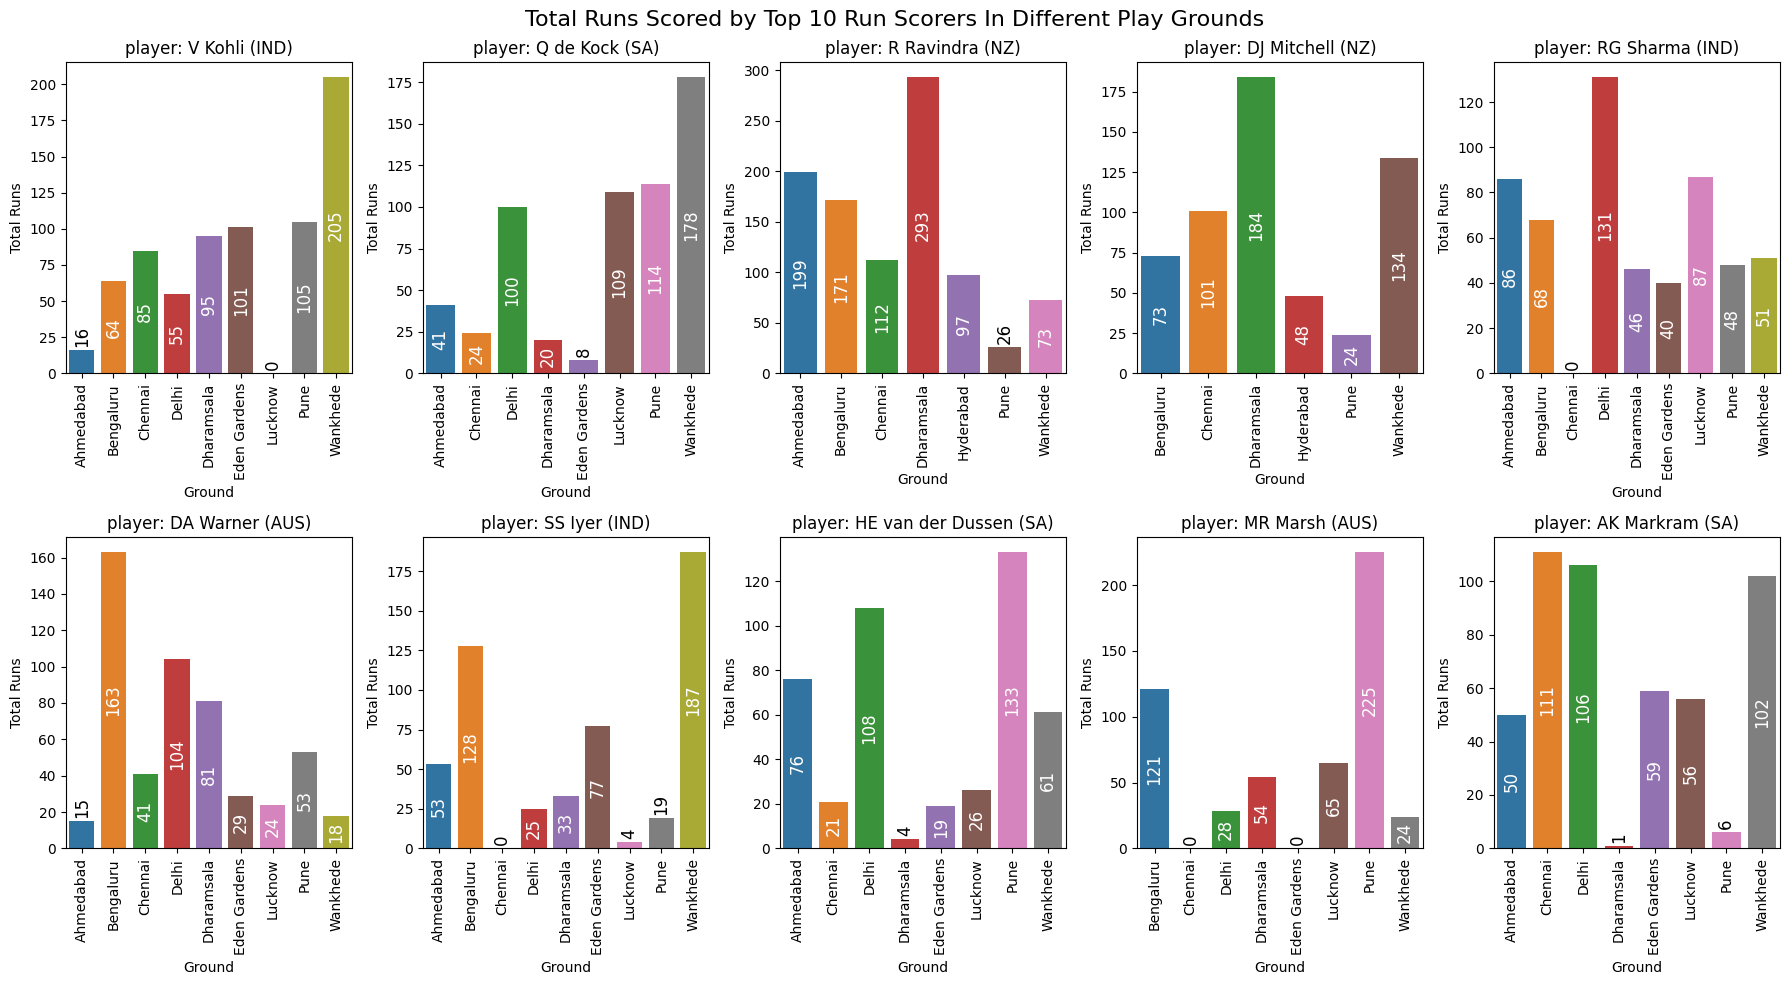

In [17]:

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Runs Scored by Top 10 Run Scorers In Different Play Grounds', fontsize=16)

# Iterate through unique team names and create bar plots
for i, player in enumerate(leading_run_scorers.head(10).index):
    row, col = divmod(i, 5)
    player_data = player_ground_stats[player_ground_stats['player'] == player]
    ax = sns.barplot(x='ground', y='runs', data=player_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'player: {player}')
    axes[row, col].set_ylabel('Total Runs')
    axes[row, col].set_xlabel('Ground')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_runs_of_top_10_run_scorers_in_each_ground.png', dpi=1500)
plt.show()

### Play ground on which each player (top 10) scored highest runs

In [16]:
max_player_ground_runs_df = player_ground_stats.groupby('player').apply(lambda x: get_max_rows(x, 'runs'))

# Reset index for better representation
max_player_ground_runs_df.reset_index(drop=True, inplace=True)
max_player_ground_runs_df = max_player_ground_runs_df[max_player_ground_runs_df['player'].isin(leading_run_scorers.head(10).index)]
max_player_ground_runs_df.drop('wkts', axis=1, inplace=True)
max_player_ground_runs_df.to_csv('ground on which each player (top 10) scored his highest runs.csv')
max_player_ground_runs_df

player      ground  runs
4           AK Markram (SA)     Chennai   111
24          DA Warner (AUS)   Bengaluru   163
26         DJ Mitchell (NZ)  Dharamsala   184
39   HE van der Dussen (SA)        Pune   133
84           MR Marsh (AUS)        Pune   225
108          Q de Kock (SA)    Wankhede   178
111         R Ravindra (NZ)  Dharamsala   293
114         RG Sharma (IND)       Delhi   131
129           SS Iyer (IND)    Wankhede   187
150           V Kohli (IND)    Wankhede   205

### Top 10 wicket takers performance in different play grounds 

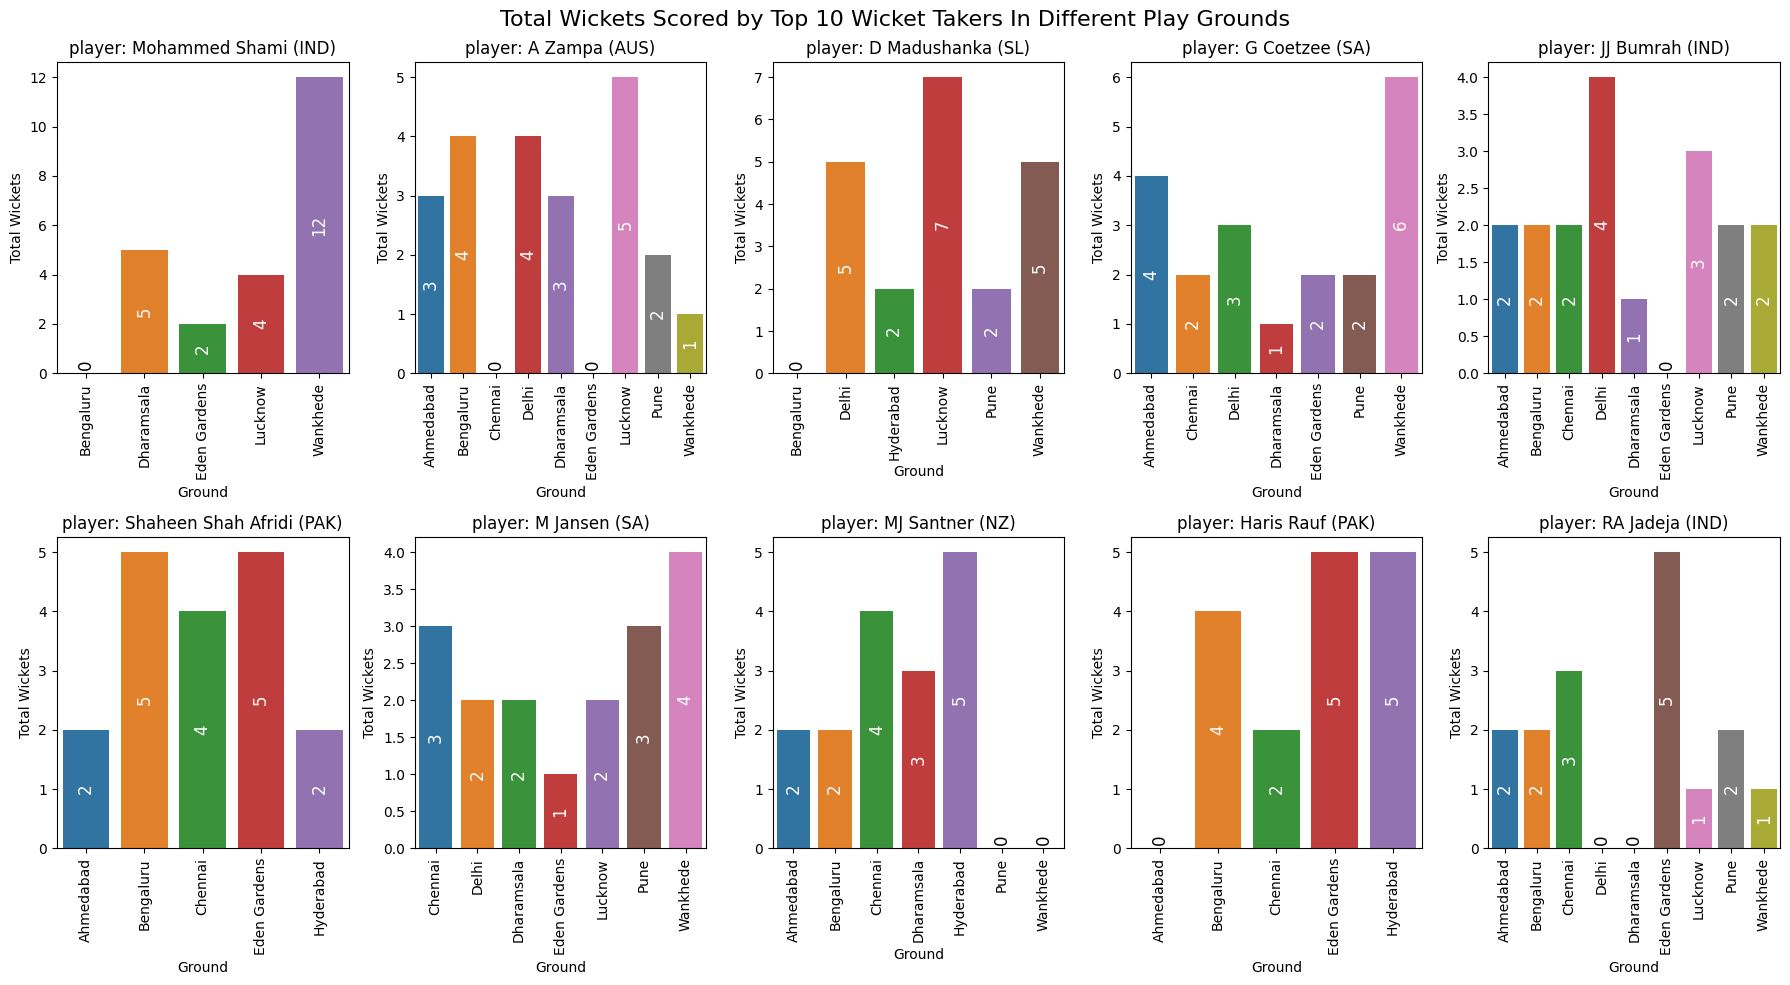

In [18]:

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Wickets Scored by Top 10 Wicket Takers In Different Play Grounds', fontsize=16)

# Iterate through unique team names and create bar plots
for i, player in enumerate(leading_wicket_takers.head(10).index):
    row, col = divmod(i, 5)
    player_data = player_ground_stats[player_ground_stats['player'] == player]
    ax = sns.barplot(x='ground', y='wkts', data=player_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'player: {player}')
    axes[row, col].set_ylabel('Total Wickets')
    axes[row, col].set_xlabel('Ground')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_wkts_of_top_10_wkts_takers_in_each_ground.png', dpi=1500)
plt.show()

### Play grounds on which each player (top 10) scored highest wickets

In [17]:
max_player_ground_wkts_df = player_ground_stats.groupby('player').apply(lambda x: get_max_rows(x, 'wkts'))

# Reset index for better representation
max_player_ground_wkts_df.reset_index(drop=True, inplace=True)
max_player_ground_wkts_df = max_player_ground_wkts_df[max_player_ground_wkts_df['player'].isin(leading_wicket_takers.head(10).index)]
max_player_ground_wkts_df.drop('runs', axis=1, inplace=True)
max_player_ground_wkts_df.to_csv('ground on which each player (top 10) scored his highest wkts.csv')
max_player_ground_wkts_df 

player        ground  wkts
2                A Zampa (AUS)       Lucknow   5.0
52           D Madushanka (SL)       Lucknow   7.0
106             G Coetzee (SA)      Wankhede   6.0
133           Haris Rauf (PAK)  Eden Gardens   5.0
134           Haris Rauf (PAK)     Hyderabad   5.0
173            JJ Bumrah (IND)         Delhi   4.0
231              M Jansen (SA)      Wankhede   4.0
258            MJ Santner (NZ)     Hyderabad   5.0
291       Mohammed Shami (IND)      Wankhede  12.0
335            RA Jadeja (IND)  Eden Gardens   5.0
411  Shaheen Shah Afridi (PAK)     Bengaluru   5.0
412  Shaheen Shah Afridi (PAK)  Eden Gardens   5.0

# Temporal analysis 

## Required analysis 

- Study performance trends over time, considering start dates and overs played.
- Identify any temporal patterns or changes in team and player performance.

## Metrics

- Total Overs 
- Total Runs
- Total Wickets

## Content 

the foloowing section contains the following topics

### Team performance over time 
- Total overs for each team over time
- Total runs for each team over time
- Total wickets for each team over time

### Player performance over time 
- Total runs for each batting player (top 10) over time  
- Total wickets for each bowling player (top 10) over time

## Team performance over time

### Total overs for each team over time

/tmp/ipykernel_42/2383123413.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


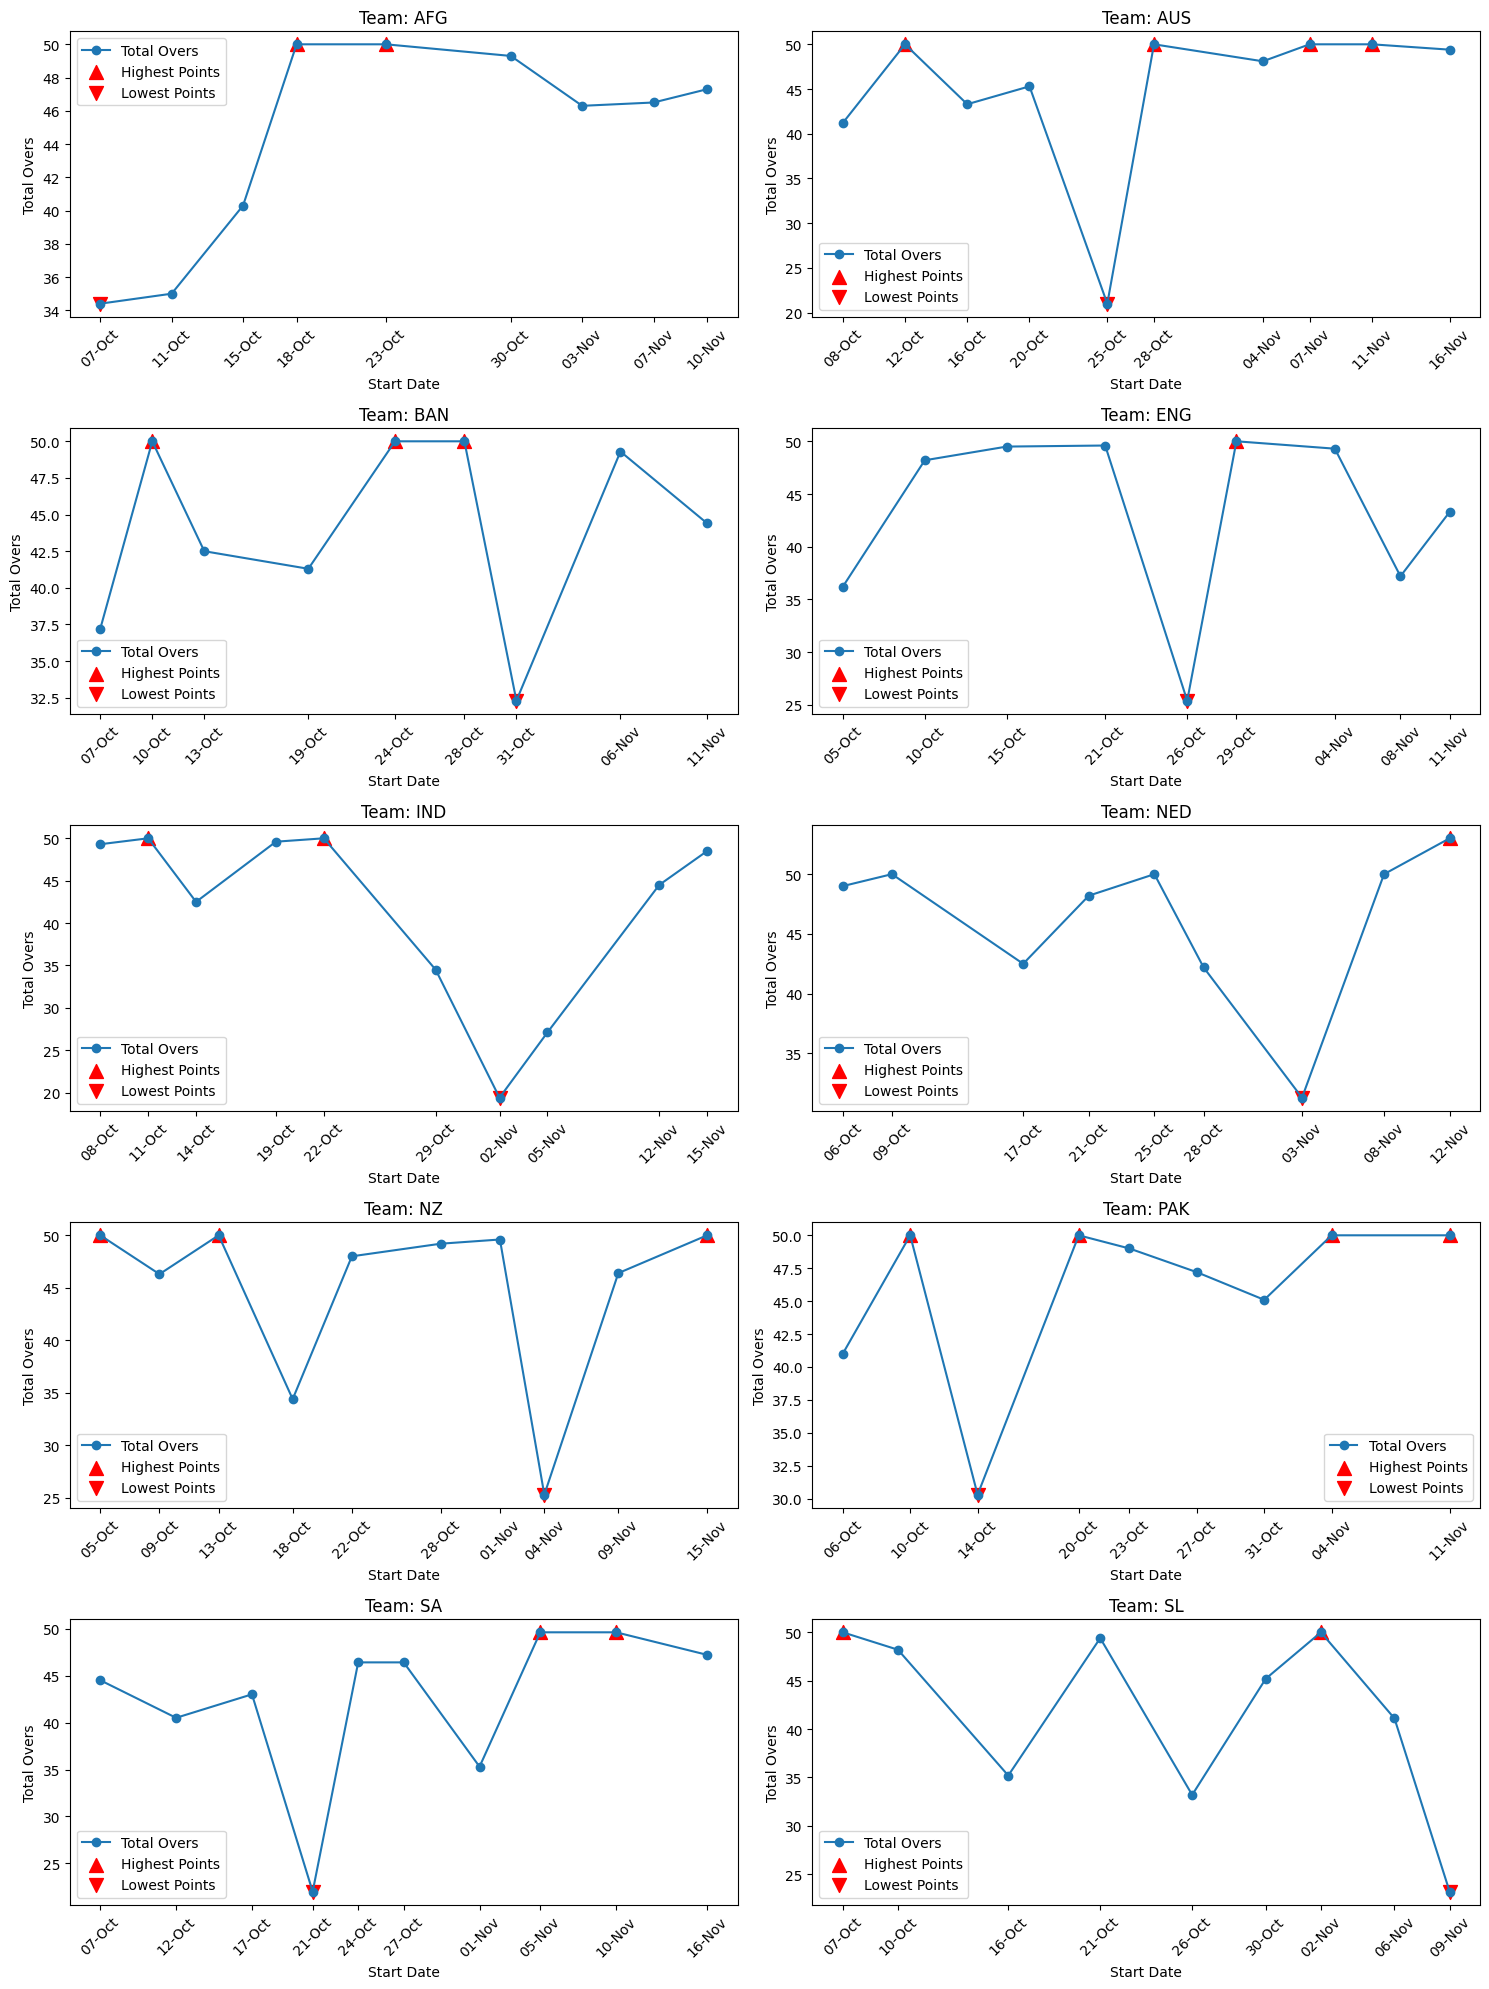

In [6]:
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['team', 'start_date']).agg({
    'overs': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
teams = df['team'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, team in enumerate(teams):
    team_data = df[df['team'] == team]
    
    # Plot line with markers for each team
    axes[i].plot(team_data['start_date'], team_data['overs'], marker='o', label='Total Overs')
    
    # Highlight all highest and lowest points with red markers
    max_points = team_data[team_data['overs'] == team_data['overs'].max()]
    min_points = team_data[team_data['overs'] == team_data['overs'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['overs'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['overs'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Overs')
    axes[i].set_title(f'Team: {team}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(team_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total overs for each team over time.png', dpi=900)
plt.show()


### Total runs for each team over time 

/tmp/ipykernel_42/2726099785.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


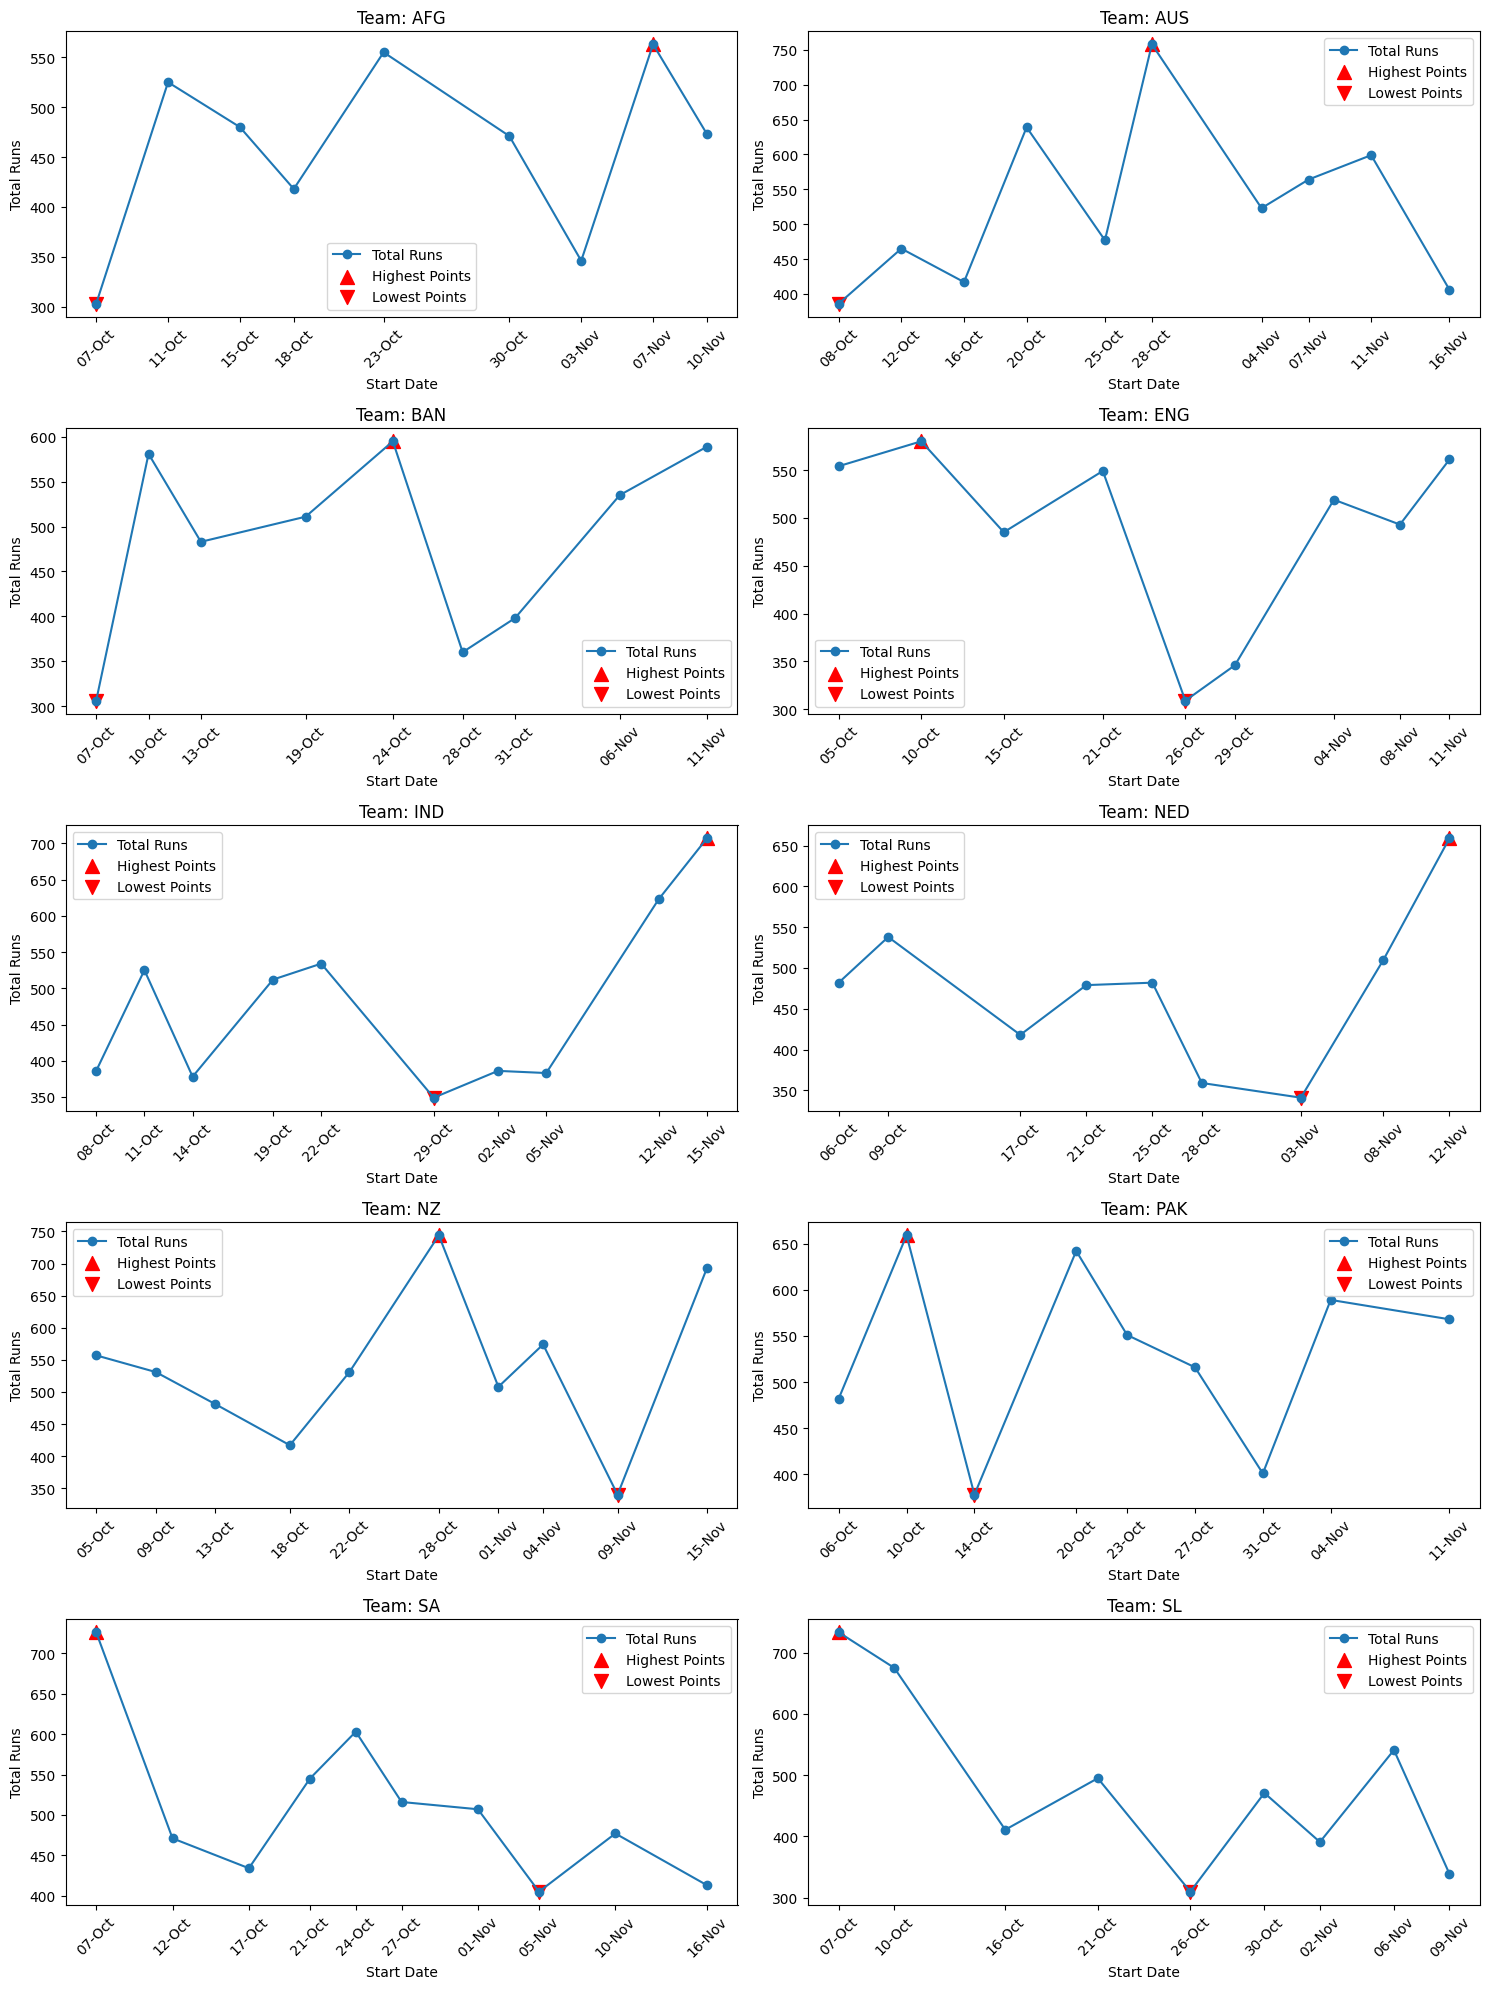

In [8]:
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['team', 'start_date']).agg({
    'runs': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
teams = df['team'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, team in enumerate(teams):
    team_data = df[df['team'] == team]
    
    # Plot line with markers for each team
    axes[i].plot(team_data['start_date'], team_data['runs'], marker='o', label='Total Runs')
    
    # Highlight all highest and lowest points with red markers
    max_points = team_data[team_data['runs'] == team_data['runs'].max()]
    min_points = team_data[team_data['runs'] == team_data['runs'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['runs'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['runs'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Runs')
    axes[i].set_title(f'Team: {team}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(team_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total runs for each team over time.png', dpi=900)
# Show the plot
plt.show()


### Total wickets for each team over time 

/tmp/ipykernel_42/2018203582.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


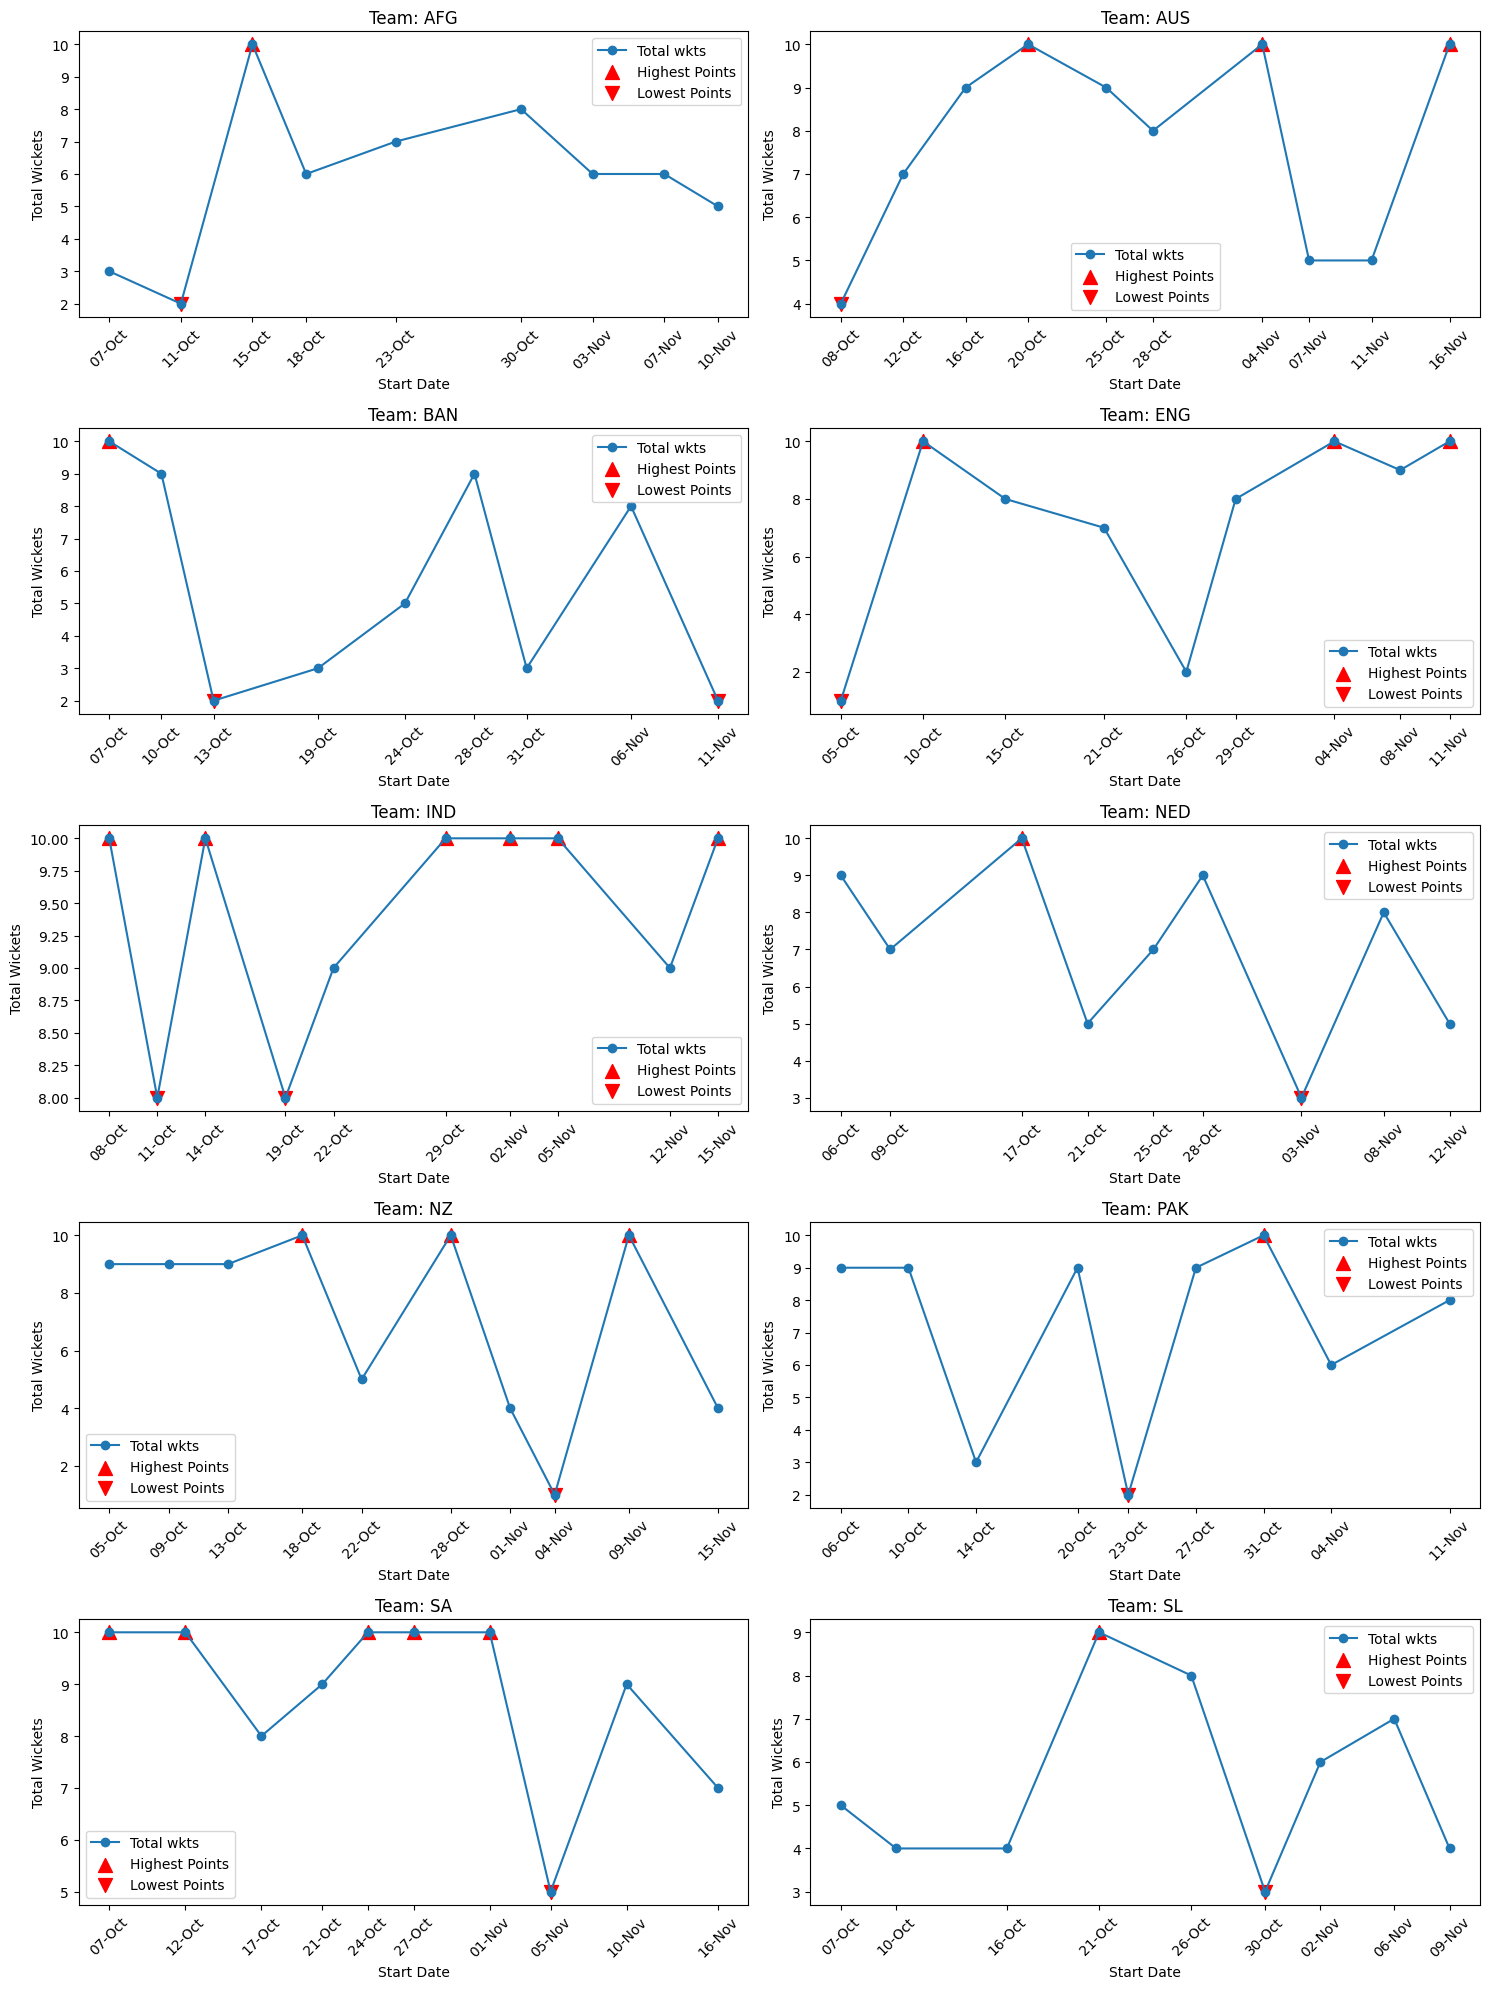

In [9]:
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['team', 'start_date']).agg({
    'wkts': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
teams = df['team'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, team in enumerate(teams):
    team_data = df[df['team'] == team]
    
    # Plot line with markers for each team
    axes[i].plot(team_data['start_date'], team_data['wkts'], marker='o', label='Total wkts')
    
    # Highlight all highest and lowest points with red markers
    max_points = team_data[team_data['wkts'] == team_data['wkts'].max()]
    min_points = team_data[team_data['wkts'] == team_data['wkts'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['wkts'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['wkts'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Wickets')
    axes[i].set_title(f'Team: {team}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(team_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total wickets for each team over time.png', dpi=900)
plt.show()

## Player performance over time

### Total runs of each batting player (top 10) over time 

/tmp/ipykernel_42/2865086445.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


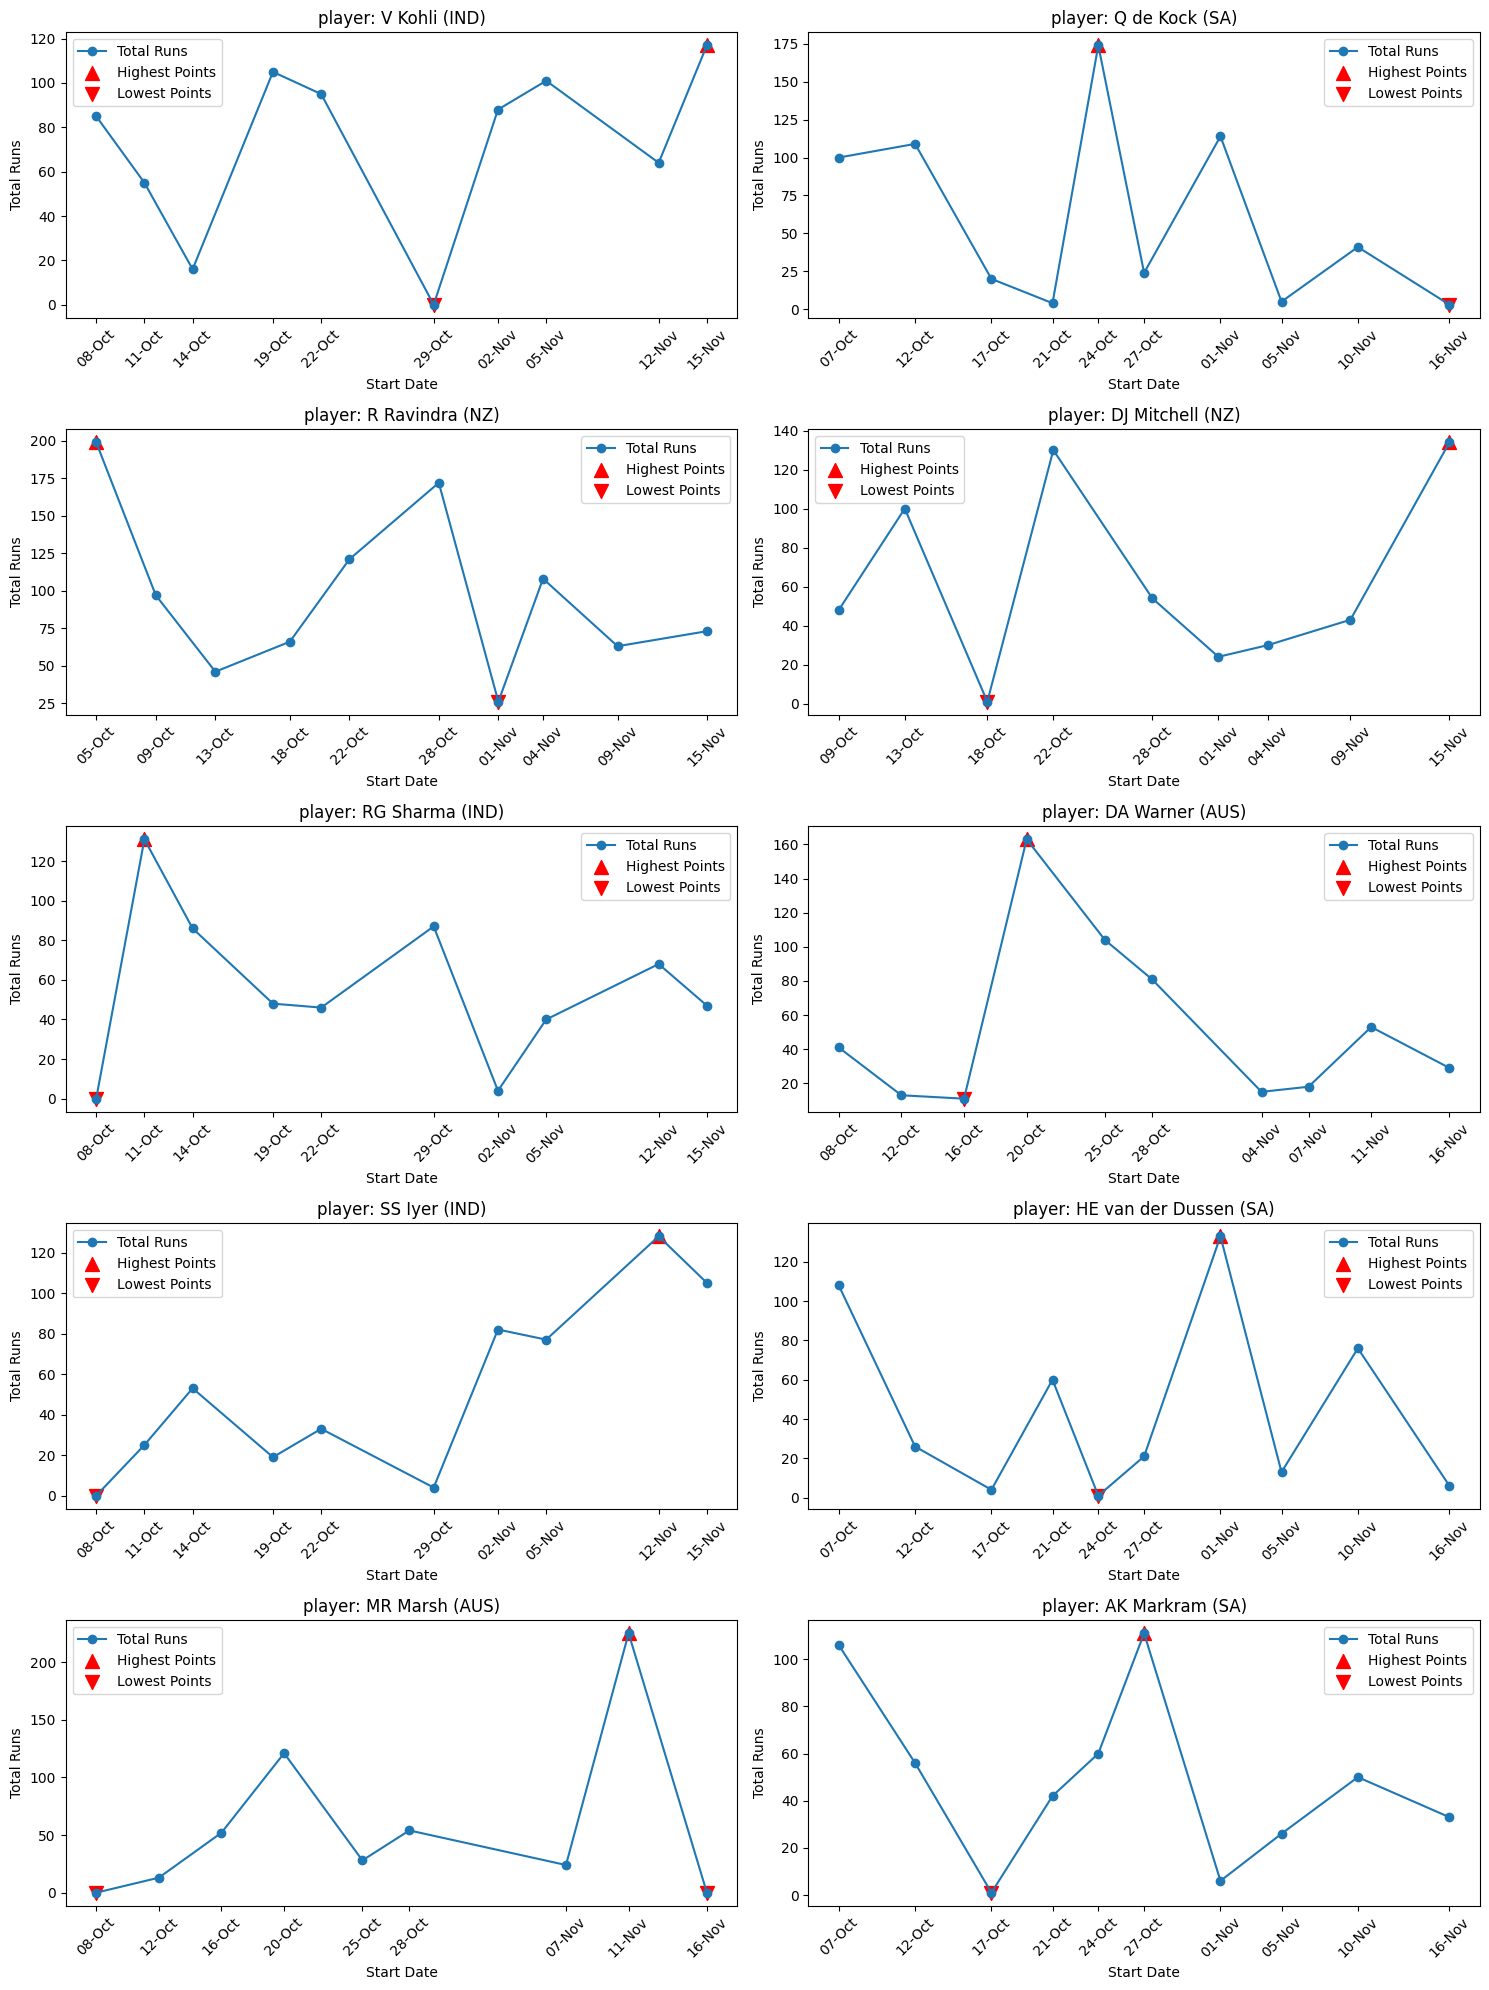

In [14]:
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['player', 'start_date']).agg({
    'runs': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
players = df['player'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, player in enumerate(leading_run_scorers.head(10).index):
    player_data = df[df['player'] == player]
    
    # Plot line with markers for each team
    axes[i].plot(player_data['start_date'], player_data['runs'], marker='o', label='Total Runs')
    
    # Highlight all highest and lowest points with red markers
    max_points = player_data[player_data['runs'] == player_data['runs'].max()]
    min_points = player_data[player_data['runs'] == player_data['runs'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['runs'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['runs'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Runs')
    axes[i].set_title(f'player: {player}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(player_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total runs for each batting player (top 10) over time.png', dpi=900)
# Show the plot
plt.show()

### Total wickets for each bowling player (top 10) over time 

/tmp/ipykernel_42/1105432588.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


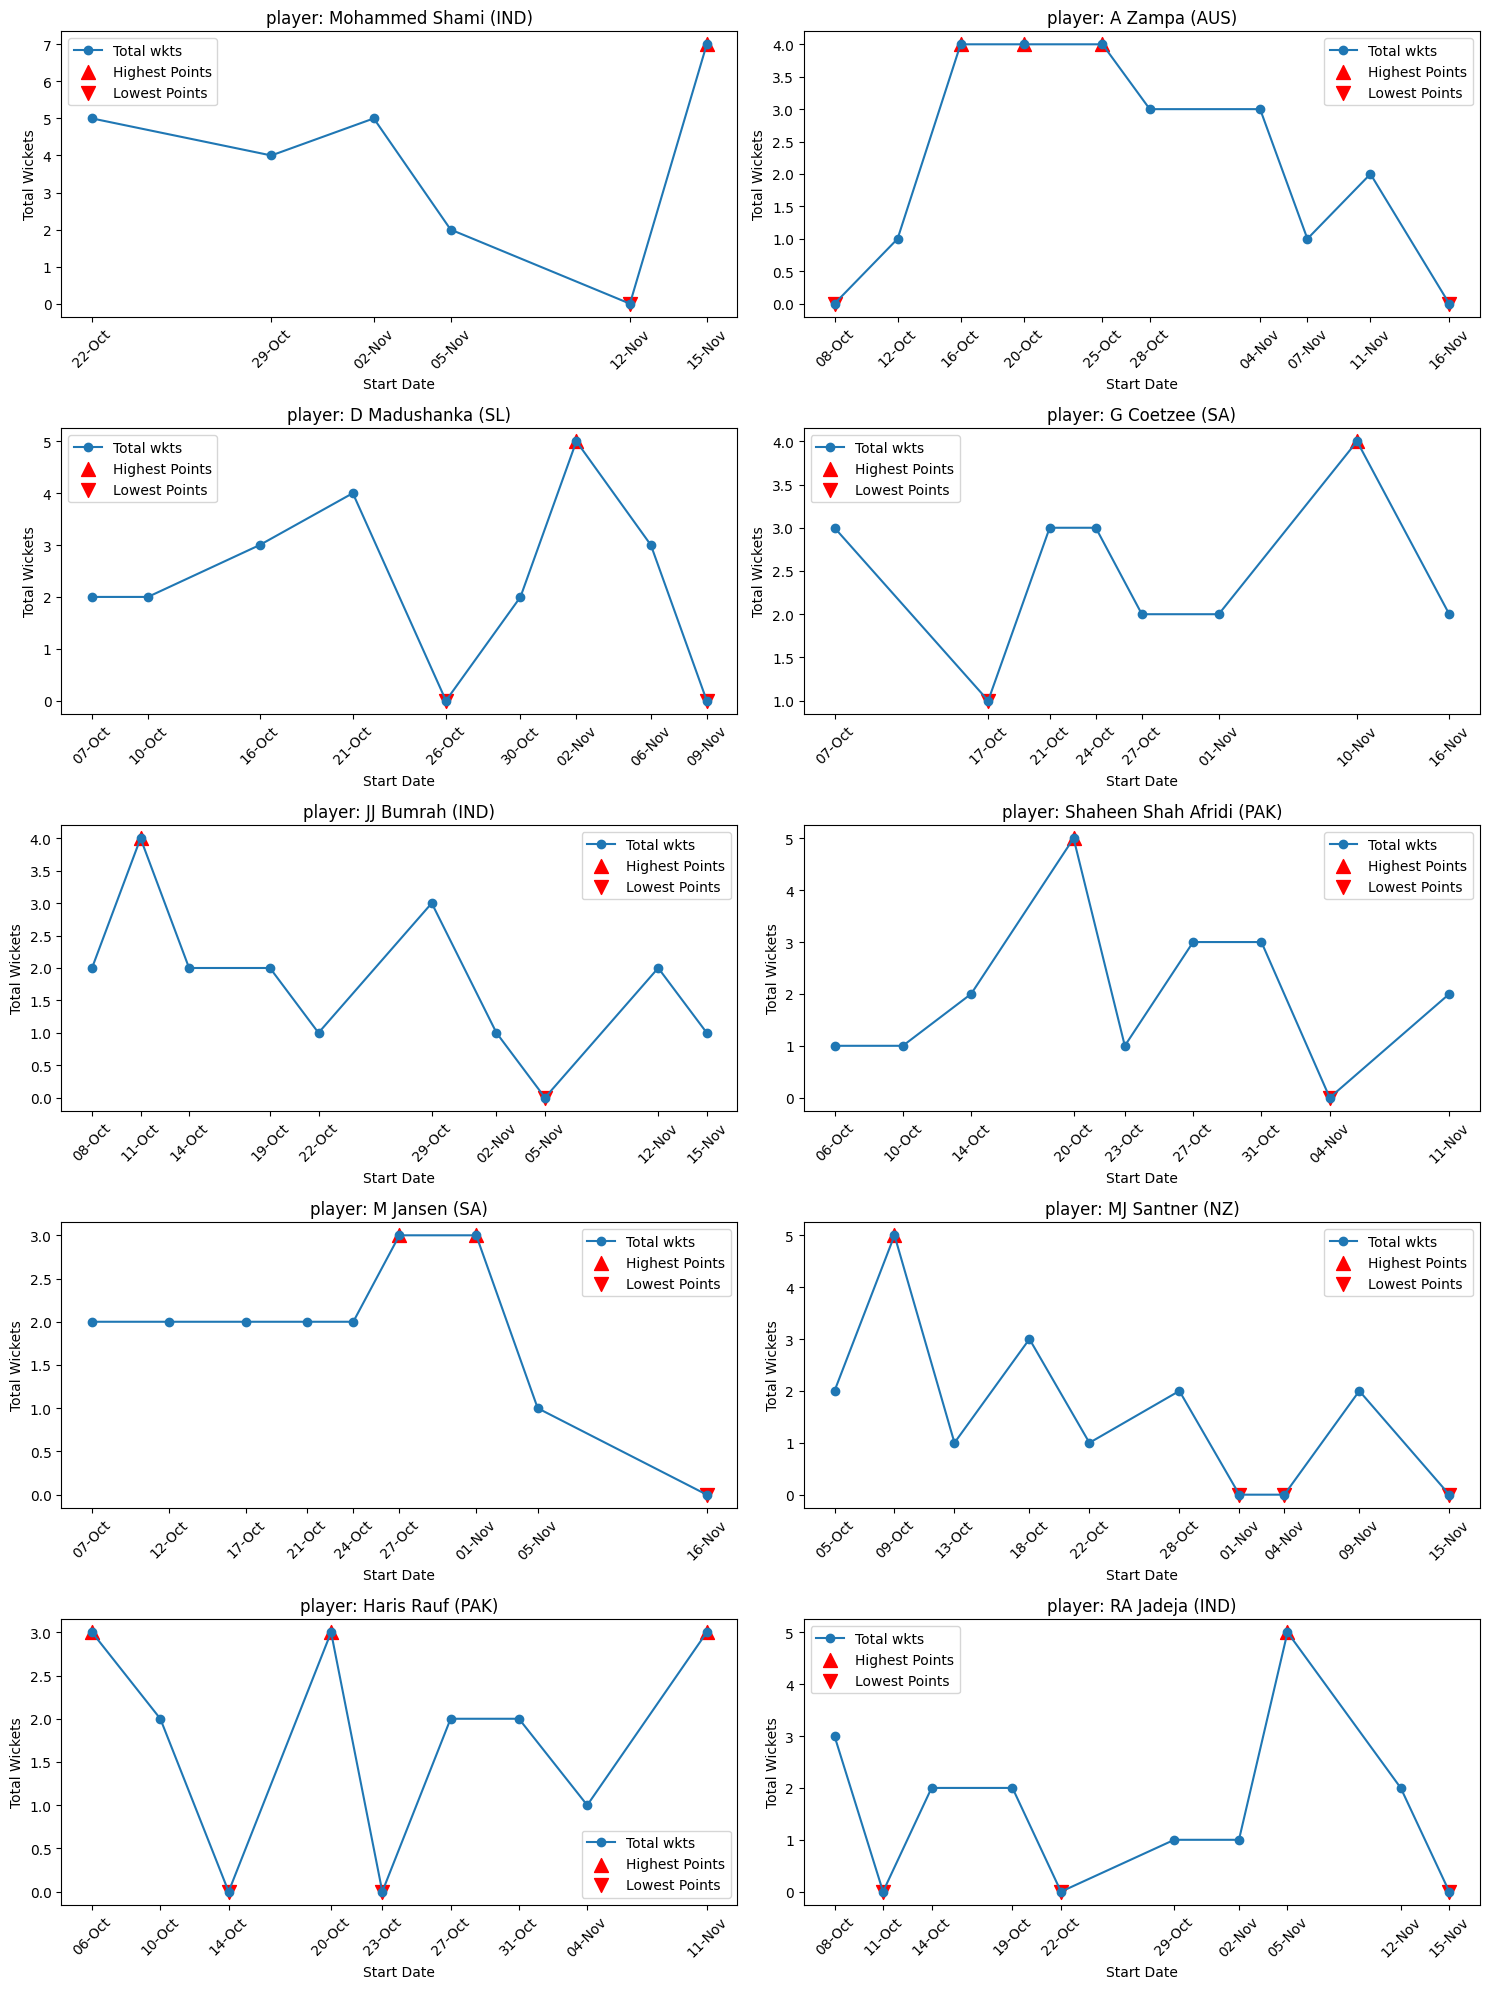

In [17]:
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['player', 'start_date']).agg({
    'wkts': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
players = df['player'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, player in enumerate(leading_wicket_takers.head(10).index):
    player_data = df[df['player'] == player]
    
    # Plot line with markers for each team
    axes[i].plot(player_data['start_date'], player_data['wkts'], marker='o', label='Total wkts')
    
    # Highlight all highest and lowest points with red markers
    max_points = player_data[player_data['wkts'] == player_data['wkts'].max()]
    min_points = player_data[player_data['wkts'] == player_data['wkts'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['wkts'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['wkts'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Wickets')
    axes[i].set_title(f'player: {player}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(player_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total wkts for each bowling player (top 10) over time.png', dpi=900)
plt.show()